In [ ]:
#  ECCRAS Project Jupyter Notebook File

## ECCRAS_DECECE Evaluation of the Climate-Resilient Agriculture and Community Adaptation Project

## Phase 1: Data Preparation & Cleaning

In [ ]:
## !pip install xlsxwriter

In [217]:
# ========================================================
# Phase 1: ECCRAS Project Data Cleaning & Preparation Script 
# ========================================================

# Import the required Libraries
import pandas as pd
import numpy as np
import xlsxwriter

# ----------------------------
# Step 1: Load dataset
# ----------------------------
input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\ECCRAS_Evaluation_Raw_Updated.csv"
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# ----------------------------
# Step 2: Standardize column names
# ----------------------------
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# ----------------------------
# Step 3: Drop variables not of interest
# ----------------------------
exclude_vars = [
    'enumerator_name', 'consent_form_url', 'location_full', 'location_altitude',
    'location_longitude', '_record_your_current_location_altitude',
    'location_precision', 'closing'
]
df = df.drop(columns=[col for col in exclude_vars if col in df.columns])

# ----------------------------
# Step 4: Create key demographics
# ----------------------------
df['age_group'] = df['age']  # Already categorical ranges
demographics = ['gender', 'age_group', 'county_name', 'primary_livelihood', 'sublocation_bungoma_trans_nzoia']

# ----------------------------
# Step 5: Identify variable types
# ----------------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in demographics]

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()



## Prepared Data

In [12]:
import pandas as pd

# Load filtered data
# input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\DESECE_ECCRAS_Raw_Filtered.csv"
# df = pd.read_csv(input_file, encoding='ISO-8859-1')

# Optional: standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# Clean the age column: remove extra spaces
df['age'] = df['age'].str.strip()

# Optional: check unique age groups
print("Unique age groups:", df['age'].unique())

# Step 2: Descriptive Statistics - Demographics
# Gender distribution
gender_dist = df['gender'].value_counts(normalize=True) * 100
print("Gender Distribution (%)\n", gender_dist)

# Age group distribution (using existing age ranges)
age_dist = df['age'].value_counts(normalize=True) * 100
print("\nAge Group Distribution (%)\n", age_dist)

# County distribution
county_dist = df['county_name'].value_counts(normalize=True) * 100
print("\nCounty Distribution (%)\n", county_dist)

# Beneficiary status (primary livelihood)
beneficiary_dist = df['primary_livelihood'].value_counts(normalize=True) * 100
print("\nBeneficiary Status (%)\n", beneficiary_dist)

Unique age groups: ['46-55' '26-35' '56+' '36-45' '18-25']
Gender Distribution (%)
 gender
Female    73.333333
Male      26.666667
Name: proportion, dtype: float64

Age Group Distribution (%)
 age
56+      43.589744
46-55    31.794872
36-45    14.871795
26-35     9.230769
18-25     0.512821
Name: proportion, dtype: float64

County Distribution (%)
 county_name
Bungoma County        66.666667
Trans Nzoia County    33.333333
Name: proportion, dtype: float64

Beneficiary Status (%)
 primary_livelihood
Crop farming         53.333333
Crop & Livestock     45.641026
Livestock rearing     0.512821
Other (specify)       0.512821
Name: proportion, dtype: float64


## B. Adoption of Climate-Resilient Practices¶

### Example: Agroforestry adoption

In [16]:
# List of climate-resilient practices
cr_practices = [
    'agroforestry_adopted', 'drought_varieties_adopted', 'crop_rotation_adopted',
    'mulching_adopted', 'composting_adopted', 'water_harvesting_adopted',
    'drip_irrigation_adopted', 'kitchen_garden_adopted', 'food_forest_adopted', 
    'soil_conservation_adopted'
]

# Calculate adoption rates
for practice in cr_practices:
    adoption_rate = df[practice].value_counts(normalize=True) * 100
    print(f"\nAdoption rate for {practice}:\n", adoption_rate)


# Disaggregate by gender / age group / county

for practice in cr_practices:
    print(f"\n{practice} adoption by gender:")
    print(pd.crosstab(df['gender'], df[practice], normalize='index')*100)


Adoption rate for agroforestry_adopted:
 agroforestry_adopted
Yes    97.42268
No      2.57732
Name: proportion, dtype: float64

Adoption rate for drought_varieties_adopted:
 drought_varieties_adopted
Yes    88.717949
No     11.282051
Name: proportion, dtype: float64

Adoption rate for crop_rotation_adopted:
 crop_rotation_adopted
Yes    98.974359
No      1.025641
Name: proportion, dtype: float64

Adoption rate for mulching_adopted:
 mulching_adopted
Yes    90.104167
No      9.895833
Name: proportion, dtype: float64

Adoption rate for composting_adopted:
 composting_adopted
Yes    98.461538
No      1.538462
Name: proportion, dtype: float64

Adoption rate for water_harvesting_adopted:
 water_harvesting_adopted
Yes    99.487179
No      0.512821
Name: proportion, dtype: float64

Adoption rate for drip_irrigation_adopted:
 drip_irrigation_adopted
Yes    76.804124
No     23.195876
Name: proportion, dtype: float64

Adoption rate for kitchen_garden_adopted:
 kitchen_garden_adopted
Yes    98.9

## Phase 2: Descriptive Analysis Plan

### Objectives:

Generate frequencies and percentages for categorical variables.

Calculate means, medians, standard deviations for numerical variables.

### Disaggregate all findings by key demographics:

Gender (gender)

Age group (age) – consider creating age bins

County (county_name)

Beneficiary Status (primary_livelihood or another proxy)

### Sections Covered:

A: Demographics

B: Climate-Resilient Practices, Adoption, Use, and Effectiveness

C: Relevance

D: Sustainability

E: Learning

F: Cook Stove Component

In [20]:

# ========================================================
# Phase 2: Descriptive Analysis - ECCRAS Project (Updated)
# ========================================================
# ----------------------------
# Step 6: Helper functions
# ----------------------------
def flatten_multiindex(df):
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str,col)).strip() for col in df.columns.values]
    return df

def categorical_descriptives(df, columns, demographics):
    results = {}
    for col in columns:
        col_results = {}
        # Overall frequencies
        overall = df[col].value_counts(dropna=False).to_frame('count')
        overall['percentage'] = overall['count'] / len(df) * 100
        col_results['overall'] = overall.reset_index().rename(columns={'index': col})

        # By demographics
        col_results['by_demographics'] = {}
        for demo in demographics:
            demo_counts = df.groupby(demo)[col].value_counts(dropna=False).unstack(fill_value=0)
            demo_perc = demo_counts.div(demo_counts.sum(axis=1), axis=0) * 100
            demo_combined = pd.concat([demo_counts, demo_perc], keys=['count','percentage'], axis=1)
            demo_combined = flatten_multiindex(demo_combined).reset_index()
            col_results['by_demographics'][demo] = demo_combined
        results[col] = col_results
    return results

def numeric_descriptives(df, columns, demographics):
    results = {}
    for col in columns:
        col_results = {}
        if df[col].dropna().empty:
            continue
        col_results['overall'] = df[col].agg(['count','mean','median','min','max','std']).to_frame().T
        col_results['by_demographics'] = {}
        for demo in demographics:
            demo_stats = df.groupby(demo)[col].agg(['count','mean','median','min','max','std']).reset_index()
            col_results['by_demographics'][demo] = demo_stats
        results[col] = col_results
    return results

# ----------------------------
# Step 7: Generate descriptive stats
# ----------------------------
cat_stats = categorical_descriptives(df, categorical_cols, demographics)
num_stats = numeric_descriptives(df, numeric_cols, demographics)

# ----------------------------
# Step 8: Prepare summary sheets for reporting
# ----------------------------
summary_sheets = {}

# Section A: Demographics overview
summary_sheets['Demographics_Overview'] = pd.DataFrame()
for demo in demographics:
    counts = df[demo].value_counts(dropna=False)
    perc = df[demo].value_counts(normalize=True, dropna=False) * 100
    demo_summary = pd.concat([counts, perc], axis=1).reset_index()
    demo_summary.columns = [demo, 'count', 'percentage']
    summary_sheets['Demographics_Overview'] = pd.concat(
        [summary_sheets['Demographics_Overview'], demo_summary], ignore_index=True
    )

# Section B: Top 5 adoption/practices for categorical variables
summary_sheets['Top5_Categorical'] = pd.DataFrame()
for col in categorical_cols:
    top5 = df[col].value_counts().head(5).reset_index()
    top5.columns = [col, 'count']
    summary_sheets['Top5_Categorical'] = pd.concat([summary_sheets['Top5_Categorical'], top5], axis=1)

# ----------------------------
# Step 9: Export to Excel
# ----------------------------
output_file = r"C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_Final.xlsx"
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    
    # Add summary sheets
    for sheet_name, df_summary in summary_sheets.items():
        df_summary.to_excel(writer, sheet_name=sheet_name[:31], index=False)
    
    # Categorical variables
    for col, stats_dict in cat_stats.items():
        stats_dict['overall'].to_excel(writer, sheet_name=f'{col}_overall'[:31], index=False)
        for demo, df_demo in stats_dict['by_demographics'].items():
            df_demo.to_excel(writer, sheet_name=f'{col}_by_{demo}'[:31], index=False)
    
    # Numeric variables
    for col, stats_dict in num_stats.items():
        stats_dict['overall'].to_excel(writer, sheet_name=f'{col}_overall'[:31], index=False)
        for demo, df_demo in stats_dict['by_demographics'].items():
            df_demo.to_excel(writer, sheet_name=f'{col}_by_{demo}'[:31], index=False)

print(f"Descriptive analysis including all counties and sub-locations exported to:\n{output_file}")


Descriptive analysis including all counties and sub-locations exported to:
C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_Final.xlsx


In [24]:
import os

# Output paths
# output_excel = r"C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_Final.xlsx"
output_txt_folder = r"C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_TXT"

# Create folder if it doesn't exist
os.makedirs(output_txt_folder, exist_ok=True)

with pd.ExcelWriter(output_excel, engine='xlsxwriter') as writer:
    
    # ----------------------------
    # Summary sheets
    # ----------------------------
    for sheet_name, df_summary in summary_sheets.items():
        df_summary.to_excel(writer, sheet_name=sheet_name[:31], index=False)
        df_summary.to_csv(os.path.join(output_txt_folder, f"{sheet_name}.txt"), sep='\t', index=False)
    
    # ----------------------------
    # Categorical variables
    # ----------------------------
    for col, stats_dict in cat_stats.items():
        # Overall
        stats_dict['overall'].to_excel(writer, sheet_name=f'{col}_overall'[:31], index=False)
        stats_dict['overall'].to_csv(os.path.join(output_txt_folder, f"{col}_overall.txt"), sep='\t', index=False)
        # By demographics
        for demo, df_demo in stats_dict['by_demographics'].items():
            sheet_name = f'{col}_by_{demo}'[:31]
            df_demo.to_excel(writer, sheet_name=sheet_name, index=False)
            df_demo.to_csv(os.path.join(output_txt_folder, f"{col}_by_{demo}.txt"), sep='\t', index=False)
    
    # ----------------------------
    # Numeric variables
    # ----------------------------
    for col, stats_dict in num_stats.items():
        # Overall
        stats_dict['overall'].to_excel(writer, sheet_name=f'{col}_overall'[:31], index=False)
        stats_dict['overall'].to_csv(os.path.join(output_txt_folder, f"{col}_overall.txt"), sep='\t', index=False)
        # By demographics
        for demo, df_demo in stats_dict['by_demographics'].items():
            sheet_name = f'{col}_by_{demo}'[:31]
            df_demo.to_excel(writer, sheet_name=sheet_name, index=False)
            df_demo.to_csv(os.path.join(output_txt_folder, f"{col}_by_{demo}.txt"), sep='\t', index=False)

print(f"Excel and TXT exports completed.\nExcel: {output_excel}\nTXT folder: {output_txt_folder}")


Excel and TXT exports completed.
Excel: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_Final.xlsx
TXT folder: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_TXT


In [26]:
import os

# Output paths
# output_excel = r"C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_Final.xlsx"
output_txt_folder = r"C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_master_TXT"

# Create folder if it doesn't exist
os.makedirs(output_txt_folder, exist_ok=True)

# Helper function to write multiple dataframes into one master TXT file per section
def export_master_txt(section_name, dfs_dict):
    master_file = os.path.join(output_txt_folder, f"{section_name}_Master.txt")
    with open(master_file, 'w', encoding='utf-8') as f:
        for key, df in dfs_dict.items():
            f.write(f"\n\n==== {key} ====\n\n")
            f.write(df.to_string(index=False))
    print(f"Master TXT for {section_name} exported: {master_file}")

with pd.ExcelWriter(output_excel, engine='xlsxwriter') as writer:
    
    # ----------------------------
    # Section A: Summary / Demographics
    # ----------------------------
    for sheet_name, df_summary in summary_sheets.items():
        df_summary.to_excel(writer, sheet_name=sheet_name[:31], index=False)
    export_master_txt("Section_A_Demographics", summary_sheets)
    
    # ----------------------------
    # Section B: Categorical variables
    # ----------------------------
    all_cat_dfs = {}
    for col, stats_dict in cat_stats.items():
        # Overall
        stats_dict['overall'].to_excel(writer, sheet_name=f'{col}_overall'[:31], index=False)
        all_cat_dfs[f"{col}_overall"] = stats_dict['overall']
        # By demographics
        for demo, df_demo in stats_dict['by_demographics'].items():
            sheet_name = f'{col}_by_{demo}'[:31]
            df_demo.to_excel(writer, sheet_name=sheet_name, index=False)
            all_cat_dfs[f"{col}_by_{demo}"] = df_demo
    export_master_txt("Section_B_Categorical", all_cat_dfs)
    
    # ----------------------------
    # Section C: Numeric variables
    # ----------------------------
    all_num_dfs = {}
    for col, stats_dict in num_stats.items():
        # Overall
        stats_dict['overall'].to_excel(writer, sheet_name=f'{col}_overall'[:31], index=False)
        all_num_dfs[f"{col}_overall"] = stats_dict['overall']
        # By demographics
        for demo, df_demo in stats_dict['by_demographics'].items():
            sheet_name = f'{col}_by_{demo}'[:31]
            df_demo.to_excel(writer, sheet_name=sheet_name, index=False)
            all_num_dfs[f"{col}_by_{demo}"] = df_demo
    export_master_txt("Section_C_Numeric", all_num_dfs)

print(f"Excel and Master TXT exports completed.\nExcel: {output_excel}\nTXT folder: {output_txt_folder}")


Master TXT for Section_A_Demographics exported: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_master_TXT\Section_A_Demographics_Master.txt
Master TXT for Section_B_Categorical exported: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_master_TXT\Section_B_Categorical_Master.txt
Master TXT for Section_C_Numeric exported: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_master_TXT\Section_C_Numeric_Master.txt
Excel and Master TXT exports completed.
Excel: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_Final.xlsx
TXT folder: C:\Users\Hp\Downloads\ECCRAS_Descriptive_Analysis_master_TXT


### PHASE 2 VISUALIZATION CODE

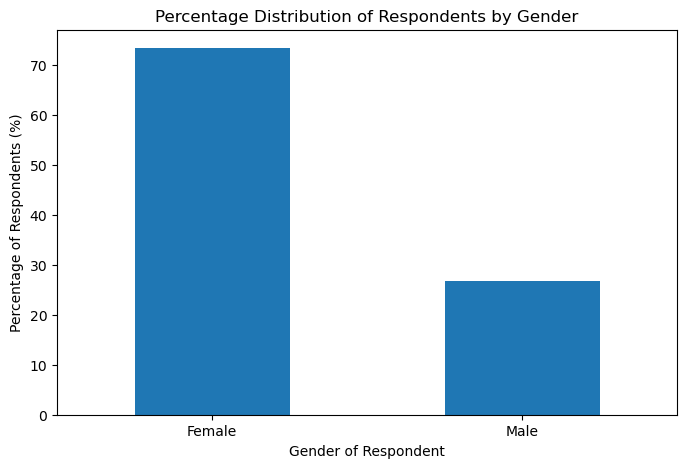

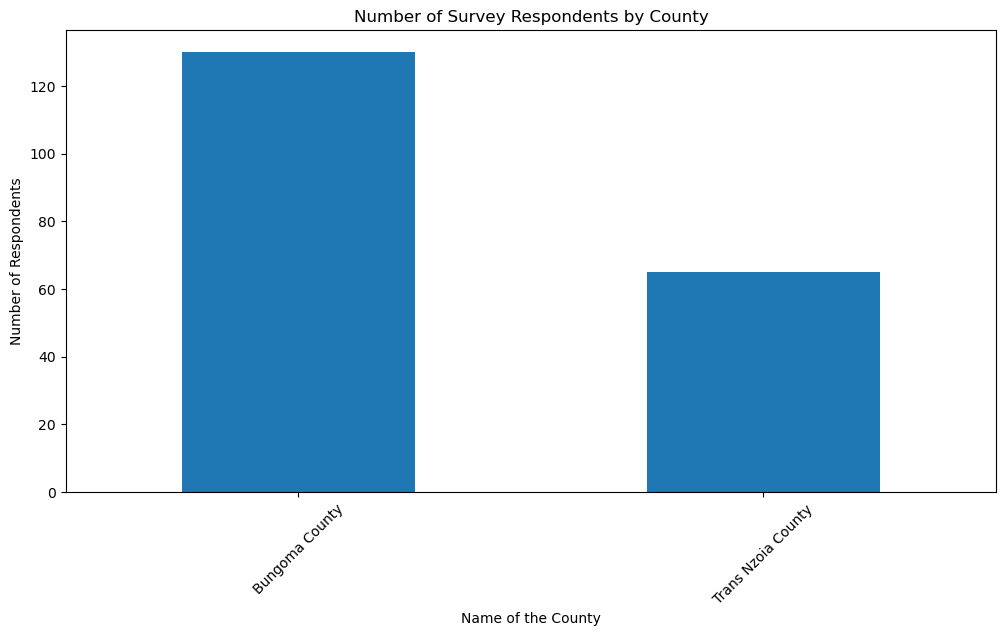

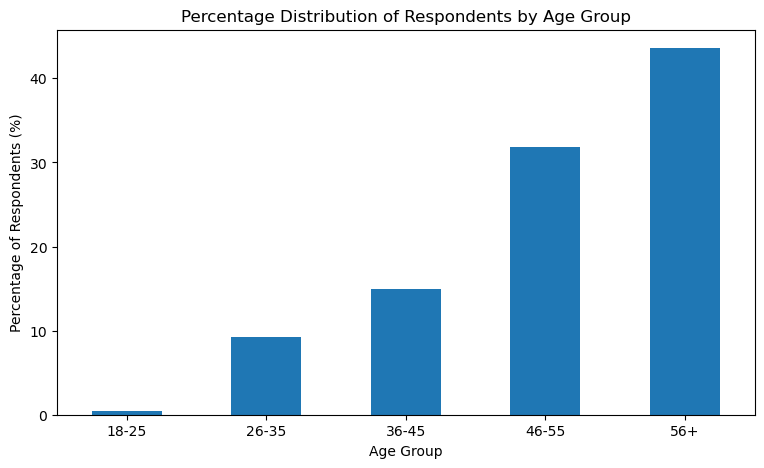

C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1542229439.py:67: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda col: col.replace({'Yes':1,'yes':1,'No':0,'NO':0,'no':0}) if col.dtype == 'object' else col


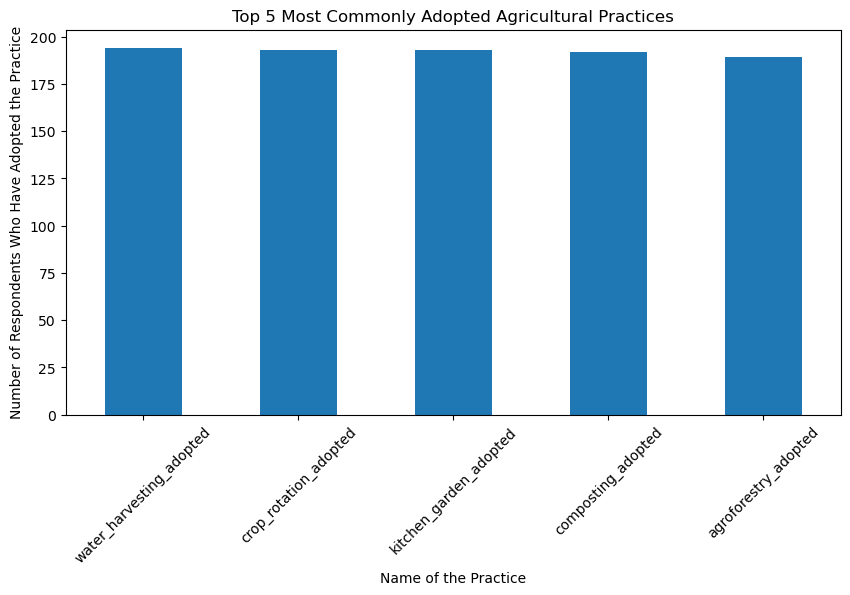


Adoption Rates by Gender (%):

        agroforestry_adopted  drought_varieties_adopted  \
gender                                                    
Female                  97.2                       88.8   
Male                    98.1                       88.5   

        crop_rotation_adopted  mulching_adopted  composting_adopted  \
gender                                                                
Female                   99.3              87.9                97.9   
Male                     98.1              96.2               100.0   

        water_harvesting_adopted  drip_irrigation_adopted  \
gender                                                      
Female                      99.3                     78.2   
Male                       100.0                     73.1   

        kitchen_garden_adopted  food_forest_adopted  soil_conservation_adopted  
gender                                                                          
Female                    98.6         

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Gender Distribution (Percentage)
# -----------------------------
gender_dist = df['gender'].value_counts(normalize=True).mul(100).round(1)
gender_dist.plot(kind='bar', figsize=(8,5))
plt.title('Percentage Distribution of Respondents by Gender')
plt.xlabel('Gender of Respondent')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=0)
plt.show()


# -----------------------------
# 2. Number of Respondents by County
# -----------------------------
county_counts = df['county_name'].value_counts()
county_counts.plot(kind='bar', figsize=(12,6))
plt.title('Number of Survey Respondents by County')
plt.xlabel('Name of the County')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


# -----------------------------
# 3. Age Group Distribution (Corrected for Categorical Age Groups)
# -----------------------------
age_group_dist = df['age'].value_counts(normalize=True).mul(100).round(1)

# Ensure the age groups appear in logical order if applicable
ordered_age_groups = ['18-25','26-35','36-45','46-55','56+']
age_group_dist = age_group_dist.reindex(ordered_age_groups)

age_group_dist.plot(kind='bar', figsize=(9,5))
plt.title('Percentage Distribution of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Respondents (%)')
plt.xticks(rotation=0)
plt.show()


# -----------------------------
# 4. Top 5 Most Adopted Practices
# -----------------------------
adoption_vars = [
    'agroforestry_adopted',
    'drought_varieties_adopted',
    'crop_rotation_adopted',
    'mulching_adopted',
    'composting_adopted',
    'water_harvesting_adopted',
    'drip_irrigation_adopted',
    'kitchen_garden_adopted',
    'food_forest_adopted',
    'soil_conservation_adopted'
]

# Convert Yes/No → 1/0 if necessary
df[adoption_vars] = df[adoption_vars].apply(
    lambda col: col.replace({'Yes':1,'yes':1,'No':0,'NO':0,'no':0}) if col.dtype == 'object' else col
)

adoption_counts = df[adoption_vars].sum().sort_values(ascending=False)
top5_adoption = adoption_counts.head(5)

top5_adoption.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Most Commonly Adopted Agricultural Practices')
plt.xlabel('Name of the Practice')
plt.ylabel('Number of Respondents Who Have Adopted the Practice')
plt.xticks(rotation=45)
plt.show()


# -----------------------------
# 5. Adoption Rate by Gender (Table Output Only)
# -----------------------------
adoption_by_gender = df.groupby('gender')[adoption_vars].mean().mul(100).round(1)
print("\nAdoption Rates by Gender (%):\n")
print(adoption_by_gender)


# -----------------------------
# 6. Adoption Rate by County (Table Output Only)
# -----------------------------
adoption_by_county = df.groupby('county_name')[adoption_vars].mean().mul(100).round(1)
print("\nAdoption Rates by County (%):\n")
print(adoption_by_county)


In [69]:
# Phase 2 Visualizations & Adoption calculations 
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")  # DO NOT set custom colors

# ----------------------------
# User config: file paths
# ----------------------------
input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\DESECE_ECCRAS_Raw_Filtered.csv"
output_dir = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2"
os.makedirs(output_dir, exist_ok=True)
fig_dir = os.path.join(output_dir, "figures")
os.makedirs(fig_dir, exist_ok=True)

# ----------------------------
# Step 1: Load dataset
# ----------------------------
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# ----------------------------
# Step 2: Drop excluded columns (not of interest)
# ----------------------------
drop_cols = [
    "enumerator_name", "consent_form_url", "location_full", "location_altitude",
    "location_longitude", "_Record your current location_altitude", "location_precision", "Closing"
]
# Make sure we only drop existing columns
drop_cols = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=drop_cols)

# ----------------------------
# Step 3: Normalize column names (optional)
# keep actual variable names but add a safe lowercase alias mapping for code convenience
# ----------------------------
# create lower-case alias mapping to avoid repetitive case-sensitivity issues
col_map = {c: c for c in df.columns}
# no rename; use actual columns in strings below

# ----------------------------
# Step 4: Age groups (your age column already contains age-groups as strings)
# Accept values like '56+', '46-55', '36-45', '26-35', '18-25'
# Create a consistent category order
# ----------------------------
age_col = "age"
age_order = ["18-25", "26-35", "36-45", "46-55", "56+"]
if age_col in df.columns:
    df[age_col] = df[age_col].astype(str).str.strip()
    df['age_group'] = pd.Categorical(df[age_col].replace({'nan': np.nan}), categories=age_order, ordered=True)
else:
    df['age_group'] = np.nan
    print("Warning: age column not found; 'age_group' will be empty.")

# ----------------------------
# Step 5: Practice adoption columns (B1, B3a)
# Use the practice *_adopted columns you listed earlier
# ----------------------------
practice_cols = [
    "agroforestry_adopted",
    "drought_varieties_adopted",
    "crop_rotation_adopted",
    "mulching_adopted",
    "composting_adopted",
    "water_harvesting_adopted",
    "drip_irrigation_adopted",
    "kitchen_garden_adopted",
    "food_forest_adopted",
    "soil_conservation_adopted",
    # if you have IPM adoption flag, add it (your var list used 'IPM' maybe)
]
# Keep only those that actually exist
practice_cols = [c for c in practice_cols if c in df.columns]
if not practice_cols:
    raise RuntimeError("No practice adoption columns found in dataset. Check column names.")

# Convert adoption indicators into boolean (True if respondent adopted)
def normalize_yes(x):
    if pd.isna(x): return False
    s = str(x).strip().lower()
    return s in ("yes", "y", "true", "1", "adopted", "adopted/used", "adopted/ used")

for c in practice_cols:
    df[c + "_bool"] = df[c].apply(normalize_yes)

adopt_bool_cols = [c + "_bool" for c in practice_cols]

# ----------------------------
# Step 6: Compute Adoption_Score and any-adopted flag
# ----------------------------
df['Adoption_Score'] = df[adopt_bool_cols].sum(axis=1)
df['Any_Practice_Adopted'] = df['Adoption_Score'] > 0

# ----------------------------
# Step 7: Convert income fields to numeric (coerce errors)
# Prefer 'est_income_2025' if available; fallback to est_income_2021
# ----------------------------
income_cols = []
if 'est_income_2025' in df.columns:
    income_cols.append('est_income_2025')
if 'est_income_2021' in df.columns:
    income_cols.append('est_income_2021')
for ic in income_cols:
    df[ic + "_num"] = pd.to_numeric(df[ic].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# ----------------------------
# Step 8: Summaries to save (DataFrames)
# ----------------------------
# A. Demographics summary: Gender, Age group, County
demog_summary = {}
if 'gender' in df.columns:
    demog_summary['Gender (%)'] = (df['gender'].fillna("Missing").value_counts(normalize=True) * 100).round(2)
if 'age_group' in df.columns:
    demog_summary['Age Group (%)'] = (df['age_group'].value_counts(normalize=True).reindex(age_order).fillna(0) * 100).round(2)
if 'county_name' in df.columns:
    demog_summary['County (%)'] = (df['county_name'].fillna("Missing").value_counts(normalize=True) * 100).round(2)

# B. Adoption rates per practice
adoption_rates = {}
for c in adopt_bool_cols:
    adoption_rates[c.replace("_bool","")] = (df[c].mean() * 100).round(2)
adoption_df = pd.DataFrame.from_dict(adoption_rates, orient='index', columns=['Adoption (%)']).sort_values('Adoption (%)', ascending=False)

# Top 5 practices
top5_practices = adoption_df.head(5)

# ----------------------------
# Step 9: Chi-square tests (practice vs gender & practice vs age_group)
# ----------------------------
chi_results = []
import math
for c in adopt_bool_cols:
    practice_name = c.replace("_bool","")
    # vs gender
    if 'gender' in df.columns:
        ct = pd.crosstab(df['gender'].fillna('Missing'), df[c])
        if ct.shape[0] > 1 and ct.shape[1] > 1:
            try:
                chi2, p, dof, ex = chi2_contingency(ct)
                chi_results.append({'practice': practice_name, 'by': 'Gender', 'chi2': float(chi2), 'pvalue': float(p), 'dof': int(dof)})
            except Exception as e:
                chi_results.append({'practice': practice_name, 'by': 'Gender', 'error': str(e)})
    # vs age_group
    if 'age_group' in df.columns:
        ct = pd.crosstab(df['age_group'].astype(str).fillna('Missing'), df[c])
        # need at least 2x2
        if ct.shape[0] > 1 and ct.shape[1] > 1:
            try:
                chi2, p, dof, ex = chi2_contingency(ct)
                chi_results.append({'practice': practice_name, 'by': 'Age Group', 'chi2': float(chi2), 'pvalue': float(p), 'dof': int(dof)})
            except Exception as e:
                chi_results.append({'practice': practice_name, 'by': 'Age Group', 'error': str(e)})

chi_df = pd.DataFrame(chi_results)

# ----------------------------
# Step 10: Adoption heatmaps (practice × Gender and practice × Age_group)
# ----------------------------
# prepare matrix of adoption % for each practice by gender
heatmap_data = {}
if 'gender' in df.columns:
    gender_categories = df['gender'].fillna('Missing').unique()
    for g in gender_categories:
        tmp = df[df['gender'].fillna('Missing') == g]
        heatmap_data[g] = tmp[adopt_bool_cols].mean().values * 100
heatmap_gender = None
if heatmap_data:
    heatmap_gender = pd.DataFrame(heatmap_data, index=[pc.replace("_bool","") for pc in adopt_bool_cols])

# by age group
heatmap_age = None
if 'age_group' in df.columns:
    age_cats = [a for a in age_order if a in df['age_group'].astype(str).unique()]
    if not age_cats:
        age_cats = df['age_group'].astype(str).unique()
    heat_age_data = {}
    for a in age_cats:
        tmp = df[df['age_group'].astype(str) == a]
        if len(tmp) == 0:
            heat_age_data[a] = [np.nan] * len(adopt_bool_cols)
        else:
            heat_age_data[a] = tmp[adopt_bool_cols].mean().values * 100
    heatmap_age = pd.DataFrame(heat_age_data, index=[pc.replace("_bool","") for pc in adopt_bool_cols])

# ----------------------------
# Step 11: Enablers (B20) & Barriers (B21) top lists and cross-tabs
# Expect columns like enabler_training, enabler_project_support, enabler_demo, enabler_group_support, enabler_results, enabler_inputs, enabler_other
# and barrier_cost, barrier_labor, barrier_knowledge, barrier_climate, barrier_pests, barrier_water ...
# ----------------------------
enabler_cols = [c for c in [
    "enabler_training","enabler_project_support","enabler_demo","enabler_group_support",
    "enabler_results","enabler_inputs","enabler_other"
] if c in df.columns]

barrier_cols = [c for c in [
    "barrier_cost","barrier_labor","barrier_knowledge","barrier_climate","barrier_pests",
    "barrier_water","barrier_conflict","barrier_more_labour_time","barrier_challenges_other"
] if c in df.columns]

def col_rate_list(cols):
    rates = {}
    for c in cols:
        # treat non-null or Yes-like as positive
        try:
            pos = df[c].apply(normalize_yes).mean() * 100
        except Exception:
            pos = (df[c].notna() & (df[c].astype(str).str.strip() != "")).mean() * 100
        rates[c] = round(pos,2)
    return pd.DataFrame.from_dict(rates, orient='index', columns=['Percent']).sort_values('Percent', ascending=False)

enablers_df = col_rate_list(enabler_cols) if enabler_cols else pd.DataFrame()
barriers_df = col_rate_list(barrier_cols) if barrier_cols else pd.DataFrame()

# Cross-tab adoption high vs low (using median split)
median_adopt = df['Adoption_Score'].median()
df['Adopt_High'] = df['Adoption_Score'] >= median_adopt

# enablers by adopt_high
enabler_by_adopt = {}
for c in enabler_cols:
    try:
        enabler_by_adopt[c] = df.groupby('Adopt_High')[c].apply(lambda s: s.apply(normalize_yes).mean() * 100).to_dict()
    except Exception:
        enabler_by_adopt[c] = {}

barrier_by_adopt = {}
for c in barrier_cols:
    try:
        barrier_by_adopt[c] = df.groupby('Adopt_High')[c].apply(lambda s: s.apply(normalize_yes).mean() * 100).to_dict()
    except Exception:
        barrier_by_adopt[c] = {}

# ----------------------------
# Step 12: Plots
# ----------------------------
# Helper to save fig in both png and svg
def save_fig(fig, name):
    png = os.path.join(fig_dir, f"{name}.png")
    svg = os.path.join(fig_dir, f"{name}.svg")
    fig.savefig(png, bbox_inches='tight')
    fig.savefig(svg, bbox_inches='tight')
    print("Saved:", png, svg)

# 1) Adoption Score Distribution (Histogram + KDE)
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Adoption_Score'].dropna(), bins=range(0, len(practice_cols)+2), kde=True, ax=ax)
ax.set_title("Distribution of Adoption Scores (Total number of practices adopted)")
ax.set_xlabel("Total Adoption Score (count of practices adopted)")
ax.set_ylabel("Number of Respondents")
save_fig(fig, "adoption_score_distribution")
plt.close(fig)

# 2) Top 5 practices bar chart
fig, ax = plt.subplots(figsize=(10,6))
top5_practices_plot = top5_practices.sort_values('Adoption (%)', ascending=True)
top5_practices_plot.plot(kind='barh', legend=False, ax=ax)
ax.set_xlabel("Adoption (%)")
ax.set_ylabel("Practice")
ax.set_title("Top 5 Practices by Adoption Rate")
# use readable practice names: replace underscores with spaces & title-case
yticks = [t.replace("_"," ").replace("adopted","").strip().title() for t in top5_practices_plot.index]
ax.set_yticklabels(yticks)
save_fig(fig, "top5_practices_adoption")
plt.close(fig)

# 3) Adoption heatmap by Gender
if heatmap_gender is not None:
    fig, ax = plt.subplots(figsize=(10, max(4, 0.35*len(heatmap_gender))))
    sns.heatmap(heatmap_gender, annot=True, fmt=".1f", linewidths=0.5, cmap="viridis", ax=ax)
    ax.set_title("Practice Adoption Rate (%) by Gender")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Practice")
    save_fig(fig, "adoption_heatmap_by_gender")
    plt.close(fig)

# 4) Adoption heatmap by Age Group
if heatmap_age is not None:
    fig, ax = plt.subplots(figsize=(10, max(4, 0.35*len(heatmap_age))))
    sns.heatmap(heatmap_age, annot=True, fmt=".1f", linewidths=0.5, cmap="viridis", ax=ax)
    ax.set_title("Practice Adoption Rate (%) by Age Group")
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Practice")
    save_fig(fig, "adoption_heatmap_by_age")
    plt.close(fig)

# 5) Boxplots of income by adoption-status (use est_income_2025_num if present)
income_to_use = None
if 'est_income_2025_num' in df.columns:
    income_to_use = 'est_income_2025_num'
elif 'est_income_2021_num' in df.columns:
    income_to_use = 'est_income_2021_num'

if income_to_use:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x=df['Any_Practice_Adopted'].map({True:"Adopted at least one practice", False:"No practice adopted"}),
                y=df[income_to_use], ax=ax)
    ax.set_title("Estimated Income (Ksh) by Any-Practice-Adopted Status")
    ax.set_xlabel("Adoption status")
    ax.set_ylabel("Estimated Income (Ksh)")
    save_fig(fig, "income_by_adoption_status")
    plt.close(fig)
else:
    print("No income column converted to numeric (est_income_2025/2021) — skipping income boxplot.")

# 6) Enablers top bars
if not enablers_df.empty:
    fig, ax = plt.subplots(figsize=(10,6))
    enablers_df.plot(kind='bar', legend=False, ax=ax)
    ax.set_ylabel("Percent (respondents indicating enabler)")
    ax.set_title("Top enabling factors (B20) reported by respondents")
    ax.set_xticklabels([c.replace("_"," ").title() for c in enablers_df.index], rotation=45, ha='right')
    save_fig(fig, "top_enablers")
    plt.close(fig)

# 7) Barriers top bars
if not barriers_df.empty:
    fig, ax = plt.subplots(figsize=(10,6))
    barriers_df.plot(kind='bar', legend=False, ax=ax)
    ax.set_ylabel("Percent (respondents indicating barrier)")
    ax.set_title("Top barriers reported by respondents (B21)")
    ax.set_xticklabels([c.replace("_"," ").title() for c in barriers_df.index], rotation=45, ha='right')
    save_fig(fig, "top_barriers")
    plt.close(fig)

# 8) Enabler/Barrier cross-tabs by adoption-high vs low (stacked bar)
def plot_by_adopt(dict_by_adopt, title, fname):
    if not dict_by_adopt:
        return
    plot_df = pd.DataFrame(dict_by_adopt).T.fillna(0)
    # reorder columns to True/False if present
    cols = list(plot_df.columns)
    fig, ax = plt.subplots(figsize=(10,6))
    plot_df.plot(kind='bar', ax=ax)
    ax.set_ylabel("Percent of respondents (by adoption-high)")
    ax.set_title(title)
    ax.set_xticklabels([c.replace("_"," ").title() for c in plot_df.index], rotation=45, ha='right')
    save_fig(fig, fname)
    plt.close(fig)

plot_by_adopt(enabler_by_adopt, "Enablers (percent) by Adoption (High vs Low)", "enablers_by_adoption")
plot_by_adopt(barrier_by_adopt, "Barriers (percent) by Adoption (High vs Low)", "barriers_by_adoption")

# ----------------------------
# Step 13: Save summary Excel + combined TXT per section
# ----------------------------
excel_out = os.path.join(output_dir, "Phase2_Summaries.xlsx")
with pd.ExcelWriter(excel_out, engine='xlsxwriter') as writer:
    # demographics
    row = 0
    for k,v in demog_summary.items():
        if isinstance(v, pd.Series):
            df_temp = v.reset_index()
            df_temp.columns = ['Category','Percent']
            sheet = "Demographics"
            df_temp.to_excel(writer, sheet_name=sheet, startrow=row, index=False)
            row += len(df_temp) + 2
    # adoption per practice
    adoption_df.to_excel(writer, sheet_name="Adoption_Rates")
    top5_practices.to_excel(writer, sheet_name="Top5_Practices")
    # chi-square results
    chi_df.to_excel(writer, sheet_name="ChiSquare_Results", index=False)
    if not enablers_df.empty:
        enablers_df.to_excel(writer, sheet_name="Enablers")
    if not barriers_df.empty:
        barriers_df.to_excel(writer, sheet_name="Barriers")
print("Saved Excel summaries to:", excel_out)

# TXT master summary combined by section
txt_out = os.path.join(output_dir, "Phase2_Master_Summary.txt")
with open(txt_out, "w", encoding="utf-8") as f:
    f.write("PHASE 2 - DESCRIPTIVE ANALYSIS SUMMARY\n")
    f.write("="*60 + "\n\n")
    # Demographics
    f.write("SECTION A - DEMOGRAPHICS\n")
    f.write("-"*40 + "\n")
    for k,v in demog_summary.items():
        f.write(f"{k}\n")
        if isinstance(v, pd.Series):
            for idx,val in v.items():
                f.write(f"  {idx}: {val:.2f}%\n")
        f.write("\n")
    # Adoption
    f.write("SECTION B - ADOPTION (Practice adoption rates)\n")
    f.write("-"*40 + "\n")
    for idx, rowv in adoption_df.iterrows():
        f.write(f"{idx}: {rowv['Adoption (%)']}%\n")
    f.write("\nTop 5 practices:\n")
    for idx,rowv in top5_practices.iterrows():
        f.write(f"  {idx}: {rowv['Adoption (%)']}%\n")
    f.write("\n")
    # Chi-square
    f.write("CHI-SQUARE TESTS (practice vs Gender/Age Group)\n")
    f.write("-"*40 + "\n")
    if chi_df.empty:
        f.write("No chi-square tests computed (insufficient data for contingency tables)\n")
    else:
        for _,r in chi_df.iterrows():
            if 'error' in r and pd.notna(r['error']):
                f.write(f"{r.get('practice')} by {r.get('by')}: ERROR: {r['error']}\n")
            else:
                f.write(f"{r.get('practice')} by {r.get('by')}: chi2={r.get('chi2'):.3f}, p={r.get('pvalue'):.4f}, dof={r.get('dof')}\n")
    f.write("\n")
    # Enablers & Barriers
    f.write("ENABLERS (B20) - top\n")
    f.write("-"*40 + "\n")
    if not enablers_df.empty:
        for i,rowv in enablers_df.iterrows():
            f.write(f"{i}: {rowv['Percent']}%\n")
    else:
        f.write("No enabler columns found.\n")
    f.write("\nBARRIERS (B21) - top\n")
    f.write("-"*40 + "\n")
    if not barriers_df.empty:
        for i,rowv in barriers_df.iterrows():
            f.write(f"{i}: {rowv['Percent']}%\n")
    else:
        f.write("No barrier columns found.\n")
print("Saved combined TXT summary to:", txt_out)

# ----------------------------
# Step 14: Final messages
# ----------------------------
print("\nAll done. Figures saved to:", fig_dir)
print("Excel summary:", excel_out)
print("Text master summary:", txt_out)

Saved: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\adoption_score_distribution.png C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\adoption_score_distribution.svg
Saved: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\top5_practices_adoption.png C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\top5_practices_adoption.svg
Saved: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\adoption_heatmap_by_gender.png C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\adoption_heatmap_by_gender.svg
Saved: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\adoption_heatmap_by_age.png C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phase2\figures\adoption_heatmap_by_age.svg
Saved: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Output_Phas

## Phase 3: Analytical Framework by Evaluation Question

## EQ1 & EQ2: Effectiveness (Achievement of Outputs & Inclusive Results)

In [51]:
# Phase 3 - EQ1 & EQ2: Effectiveness (Achievement of Outputs & Inclusive Results)

import os
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# ----------------------------
# ----------------------------
input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\DESECE_ECCRAS_Raw_Filtered.csv"
output_dir = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\Phase3_Effectiveness_Analysis"
os.makedirs(output_dir, exist_ok=True)
excel_output = os.path.join(output_dir, "Phase3_EQ1_EQ2_Descriptives.xlsx")
txt_output = os.path.join(output_dir, "Section_3_Effectiveness.txt")
plots_dir = os.path.join(output_dir, "plots")
os.makedirs(plots_dir, exist_ok=True)

# ----------------------------
# Step 0: Read data
# ----------------------------
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# Drop variables not for analysis (per your instruction)
drop_cols = [
    'enumerator_name', 'consent_form_url', 'location_full', 'location_altitude',
    'location_longitude', '_Record your current location_altitude', 'location_precision', 'Closing'
]
for c in drop_cols:
    if c in df.columns:
        df = df.drop(columns=c)

# ----------------------------
# Step 1: Standardize and small-cleaning
# ----------------------------
# Keep only variables of interest (the list you provided). If extras present, they'll be ignored in analysis tables.
# Normalize column names to exact ones used in your dataset (we won't rename to derived names here).
# Trim whitespace for string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().replace({'nan': np.nan})

# Create a reproducible mapping to interpret Yes/No and numeric flags
def to_bool_like(x):
    """Return 1 for affirmation (yes/true/1), 0 for no/false/0, np.nan otherwise."""
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    if s in {'yes','y','true','1','t','adopted','used','received','have','yes '}:
        return 1
    if s in {'no','n','false','0','none','not','no '}:
        return 0
    # some categorical variants: 'sometimes', 'partial' -> treat as 1
    if s in {'sometimes','partial','partly','partially','rarely','occasionally','sometimes '}:
        return 1
    # numeric
    try:
        v = float(s)
        if v == 1.0:
            return 1
        if v == 0.0:
            return 0
    except:
        pass
    return np.nan

# ----------------------------
# Step 2: Age group handling
# ----------------------------
# Your age column already contains group strings like '56+', '46-55', etc.
# Normalize spacing and ensure consistent categories, then make ordered categorical
age_map = {
    '18-25':'18-25', '18 - 25':'18-25',
    '26-35':'26-35','26 - 35':'26-35',
    '36-45':'36-45','36 - 45':'36-45',
    '46-55':'46-55','46 - 55':'46-55',
    '55-64':'55-64','56+':'56+','65+':'65+'
}
# apply mapping carefully
df['age'] = df['age'].astype(str).str.strip()
df['age_group'] = df['age'].map(age_map).fillna(df['age'])  # keep original if not mapped

# order categories
age_order = ['18-25','26-35','36-45','46-55','55-64','56+','65+']
df['age_group'] = pd.Categorical(df['age_group'], categories=[c for c in age_order if c in df['age_group'].unique()], ordered=True)

# ----------------------------
# Step 3: Define demographics and practice columns
# ----------------------------
demographics = {
    'Gender': 'gender',
    'Age_Group': 'age_group',
    'Name_of_the_County': 'county_name',
    # Proxy for Beneficiary Status - replace with real column if available.
    'Beneficiary_Status_proxy': 'primary_livelihood'
}
beneficiary_col = demographics['Beneficiary_Status_proxy']  # proxy chosen; change if you have explicit beneficiary_status column

# Key adopted-practices columns (B1/B3 adopted flags) - update if your dataset column names differ
practice_adopt_cols = [
    'agroforestry_adopted',
    'drought_varieties_adopted',
    'crop_rotation_adopted',
    'mulching_adopted',
    'composting_adopted',
    'water_harvesting_adopted',
    'drip_irrigation_adopted',
    'kitchen_garden_adopted',
    'food_forest_adopted',
    'soil_conservation_adopted'
]
# keep only those that exist in df
practice_adopt_cols = [c for c in practice_adopt_cols if c in df.columns]
if not practice_adopt_cols:
    raise ValueError("No adoption columns found — check column names. Found columns: " + ", ".join(df.columns))

# Map adoption columns to boolean-like 0/1
for c in practice_adopt_cols:
    df[c + '_bin'] = df[c].apply(to_bool_like)

adoption_bin_cols = [c + '_bin' for c in practice_adopt_cols]

# Adoption score (sum of adopted practices)
df['adoption_score'] = df[adoption_bin_cols].sum(axis=1, skipna=True)
# Also compute number of responses (non-missing) to adoption questions to allow robust denominators
df['adoption_n_responses'] = df[adoption_bin_cols].notna().sum(axis=1)

# ----------------------------
# Step 4: EQ1 - Output Achievement & Outcomes (descriptives)
# ----------------------------
def pct(series, denom=None):
    if denom is None:
        denom = series.notna().sum()
    return 100.0 * series.sum(skipna=True) / denom if denom>0 else np.nan

# Overall adoption % by practice
adoption_summary = []
for col, bincol in zip(practice_adopt_cols, adoption_bin_cols):
    total_responded = df[bincol].notna().sum()
    adopted = int(df[bincol].sum(skipna=True))
    pct_adopted = pct(df[bincol])
    adoption_summary.append({
        'Practice_Variable': col,
        'Responses': total_responded,
        'Adopted_count': adopted,
        'Adoption_percent': round(pct_adopted,2)
    })
adoption_df = pd.DataFrame(adoption_summary).sort_values('Adoption_percent', ascending=False)

# Adoption by demographics (Gender, Age, County, Beneficiary proxy)
def adoption_by_group(df, group_col, bin_cols):
    results = {}
    groups = df[group_col].dropna().unique()
    for g in sorted(groups, key=lambda x: str(x)):
        sub = df[df[group_col] == g]
        row = {}
        for b in bin_cols:
            row[b] = round(pct(sub[b], denom=sub[b].notna().sum()),2) if sub[b].notna().sum()>0 else np.nan
        results[g] = row
    return pd.DataFrame(results).T

adoption_by_gender = adoption_by_group(df, demographics['Gender'], adoption_bin_cols)
adoption_by_age = adoption_by_group(df, demographics['Age_Group'], adoption_bin_cols)
adoption_by_county = adoption_by_group(df, demographics['Name_of_the_County'], adoption_bin_cols)
adoption_by_beneficiary = adoption_by_group(df, beneficiary_col, adoption_bin_cols)

# Adoption score summary overall and by groups
adoption_score_overall = df['adoption_score'].describe()

adoption_score_by_gender = df.groupby(demographics['Gender'])['adoption_score'].agg(['count','mean','median','std']).reset_index()
adoption_score_by_age = df.groupby(demographics['Age_Group'])['adoption_score'].agg(['count','mean','median','std']).reset_index()
adoption_score_by_county = df.groupby(demographics['Name_of_the_County'])['adoption_score'].agg(['count','mean','median','std']).reset_index()
adoption_score_by_beneficiary = df.groupby(beneficiary_col)['adoption_score'].agg(['count','mean','median','std']).reset_index()

# ----------------------------
# Step 5: EQ1 Outcome - Preparedness and Actions (B15, B16, B17, B18, B19)
# ----------------------------
# These columns may have different names in your dataset; check and adapt if necessary.
# I'll handle common candidates if they exist.
preparedness_col = 'climate_preparedness'        # B15
knowledge_cols_prefix = 'skill_'                  # B16 items often start with skill_
actions_cols_prefix = 'action_'                   # B17 items often start with action_
actions_cols = [c for c in df.columns if c.startswith(actions_cols_prefix)]
knowledge_cols = [c for c in df.columns if c.startswith(knowledge_cols_prefix)]

preparedness_freq = df[preparedness_col].value_counts(dropna=True) if preparedness_col in df.columns else pd.Series(dtype=float)

# Summarize knowledge and actions (counts / % of respondents who reported)
knowledge_summary = {}
for k in knowledge_cols:
    knowledge_summary[k] = df[k].apply(to_bool_like).sum(skipna=True)
knowledge_summary = pd.Series(knowledge_summary).sort_values(ascending=False)

actions_summary = {}
for a in actions_cols:
    actions_summary[a] = df[a].apply(to_bool_like).sum(skipna=True)
actions_summary = pd.Series(actions_summary).sort_values(ascending=False)

# ----------------------------
# Step 6: EQ1 Income Change (B8,B9,B10,B11,B12,B13) - Wilcoxon
# ----------------------------
# Columns: est_income_2021 and est_income_2025 look like 'est_income_2021' and 'est_income_2025'
income_2021_col = 'est_income_2021'
income_2025_col = 'est_income_2025'

# Clean numeric income columns
def clean_numeric(col):
    if col not in df.columns:
        return None
    s = df[col].astype(str).str.replace(r'[^\d\.\-]', '', regex=True)
    s = s.replace('', np.nan)
    return pd.to_numeric(s, errors='coerce')

income2021 = clean_numeric(income_2021_col)
income2025 = clean_numeric(income_2025_col)

wilcox_result = None
if income2021 is not None and income2025 is not None:
    paired = pd.concat([income2021, income2025], axis=1).dropna()
    paired.columns = ['inc2021','inc2025']
    if not paired.empty:
        try:
            stat, pval = wilcoxon(paired['inc2021'], paired['inc2025'])
            wilcox_result = {'n': len(paired), 'statistic': stat, 'p_value': pval,
                             'median_2021': paired['inc2021'].median(), 'median_2025': paired['inc2025'].median()}
        except Exception as e:
            wilcox_result = {'error': str(e)}
    else:
        wilcox_result = {'error': 'No paired income data (no rows with both 2021 and 2025 income).'}
else:
    wilcox_result = {'error': 'Income columns missing'}

# Also compute simple aggregated income totals / medians
income_summary = {}
if income2021 is not None:
    income_summary['2021_count'] = int(income2021.notna().sum())
    income_summary['2021_median'] = float(np.nanmedian(income2021))
    income_summary['2021_mean'] = float(np.nanmean(income2021))
if income2025 is not None:
    income_summary['2025_count'] = int(income2025.notna().sum())
    income_summary['2025_median'] = float(np.nanmedian(income2025))
    income_summary['2025_mean'] = float(np.nanmean(income2025))

# ----------------------------
# Step 7: EQ2 - Inclusive Results (Chi-square for adoption by gender / age groups)
# ----------------------------
# We'll compute cross-tabs and percentages and also highlight notable differences.
def cross_tab_percent(df, cat_col, bin_col):
    ct = pd.crosstab(df[cat_col], df[bin_col])
    # convert to percent of row
    ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
    return ct, ct_pct

# Example: kitchen_garden adoption by gender (if exists)
inclusive_checks = {}
for b in adoption_bin_cols:
    colname = b.replace('_bin','')
    if demographics['Gender'] in df.columns:
        ct, ct_pct = cross_tab_percent(df, demographics['Gender'], b)
        inclusive_checks[b] = {'ct': ct, 'ct_pct': ct_pct}

# Cookstove use by gender - check F2 variables
f2_received = 'stove_received'
f2_used = 'stove_used'
f2_barriers_prefix = 'stove_reason_'
f2_barriers = [c for c in df.columns if c.startswith(f2_barriers_prefix)]

cookstove_summary = {}
if f2_received in df.columns:
    cookstove_summary['received_overall'] = df[f2_received].apply(to_bool_like).sum(skipna=True)
if f2_used in df.columns:
    cookstove_summary['used_overall'] = df[f2_used].apply(to_bool_like).sum(skipna=True)
# by gender
if demographics['Gender'] in df.columns and f2_received in df.columns:
    cookstove_summary['received_by_gender'] = pd.crosstab(df[demographics['Gender']], df[f2_received].apply(to_bool_like), normalize='index')*100
if demographics['Gender'] in df.columns and f2_used in df.columns:
    cookstove_summary['used_by_gender'] = pd.crosstab(df[demographics['Gender']], df[f2_used].apply(to_bool_like), normalize='index')*100

# ----------------------------
# Step 8: Save outputs (Excel and TXT) and produce plots
# ----------------------------
# Excel writer
with pd.ExcelWriter(excel_output, engine='xlsxwriter') as writer:
    # adoption summary
    adoption_df.to_excel(writer, sheet_name='Adoption_Overall', index=False)
    adoption_by_gender.to_excel(writer, sheet_name='Adoption_by_Gender')
    adoption_by_age.to_excel(writer, sheet_name='Adoption_by_Age')
    adoption_by_county.to_excel(writer, sheet_name='Adoption_by_County')
    adoption_by_beneficiary.to_excel(writer, sheet_name='Adoption_by_BeneficiaryProxy')

    # adoption score summaries
    pd.DataFrame(adoption_score_overall).transpose().to_excel(writer, sheet_name='Adoption_Score_Overall', index=False)
    adoption_score_by_gender.to_excel(writer, sheet_name='AdoptionScore_by_Gender', index=False)
    adoption_score_by_age.to_excel(writer, sheet_name='AdoptionScore_by_Age', index=False)
    adoption_score_by_county.to_excel(writer, sheet_name='AdoptionScore_by_County', index=False)
    adoption_score_by_beneficiary.to_excel(writer, sheet_name='AdoptionScore_by_Beneficiary', index=False)

    # Preparedness, Knowledge, Actions
    if preparedness_col in df.columns:
        preparedness_freq.to_frame(name='count').to_excel(writer, sheet_name='Preparedness')
    pd.DataFrame(knowledge_summary, columns=['count']).to_excel(writer, sheet_name='Knowledge_Summary')
    pd.DataFrame(actions_summary, columns=['count']).to_excel(writer, sheet_name='Actions_Summary')

    # Income
    pd.DataFrame([income_summary]).to_excel(writer, sheet_name='Income_Summary', index=False)
    pd.DataFrame([wilcox_result]).to_excel(writer, sheet_name='Wilcoxon_Result', index=False)

    # Cookstove
    if 'received_by_gender' in cookstove_summary:
        cookstove_summary['received_by_gender'].to_excel(writer, sheet_name='Stove_Received_by_Gender')
    if 'used_by_gender' in cookstove_summary:
        cookstove_summary['used_by_gender'].to_excel(writer, sheet_name='Stove_Used_by_Gender')

# TXT summary for quick reporting
with open(txt_output, 'w', encoding='utf-8') as f:
    f.write("Phase 3 - EQ1 & EQ2: Effectiveness - Summary\n")
    f.write("==========================================\n\n")
    f.write("Data file: {}\n\n".format(input_file))
    f.write("Note: 'Beneficiary_Status' disaggregation used 'primary_livelihood' as a proxy. Replace with actual beneficiary variable if available.\n\n")
    f.write("1) Overall adoption rates (Top practices):\n")
    f.write(adoption_df.head(10).to_string(index=False))
    f.write("\n\n2) Adoption score (overall):\n")
    f.write(str(adoption_score_overall))
    f.write("\n\n3) Adoption by Gender (Adoption %):\n")
    f.write(adoption_by_gender.to_string())
    f.write("\n\n4) Adoption by Age Group (Adoption %):\n")
    f.write(adoption_by_age.to_string())
    f.write("\n\n5) Adoption by County (Adoption %):\n")
    f.write(adoption_by_county.to_string())
    f.write("\n\n6) Income summary and Wilcoxon paired test (2021 vs 2025):\n")
    f.write(str(income_summary) + "\n")
    f.write("Wilcoxon result:\n")
    f.write(str(wilcox_result) + "\n\n")
    f.write("7) Top Knowledge items reported (counts):\n")
    f.write(knowledge_summary.head(10).to_string() + "\n\n")
    f.write("8) Top Actions/Assets adopted (counts):\n")
    f.write(actions_summary.head(10).to_string() + "\n\n")
    f.write("9) Cookstove summary (if present):\n")
    if 'received_overall' in cookstove_summary:
        f.write(f"Stove received (overall count): {cookstove_summary['received_overall']}\n")
    if 'used_overall' in cookstove_summary:
        f.write(f"Stove used (overall count): {cookstove_summary['used_overall']}\n")
    f.write("\nEnd of Section 3 summary.\n")

# ----------------------------
# Step 9: Plots (save PNG)
# ----------------------------
# 1) Top 5 practices by adoption %
top5 = adoption_df.sort_values('Adoption_percent', ascending=False).head(5)
plt.figure(figsize=(8,5))
plt.barh(top5['Practice_Variable'][::-1], top5['Adoption_percent'][::-1])
plt.xlabel('Adoption Percent (%)')
plt.title('Top 5 Adopted Practices (Adoption Percent)')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'top5_adopted_practices.png'), dpi=150)
plt.close()

# 2) Adoption by Gender - stacked bar for top 5 practices
top5_cols = list(top5['Practice_Variable'])
# map to bin names
top5_bins = [c + '_bin' for c in top5_cols]
# ensure exist
top5_bins = [b for b in top5_bins if b in df.columns]

if demographics['Gender'] in df.columns and top5_bins:
    gender_order = df[demographics['Gender']].dropna().unique()
    adoption_gender_df = adoption_by_gender[top5_bins].copy()
    # rename columns to nicer labels
    adoption_gender_df.columns = [col.replace('_bin','').replace('_',' ').title() for col in adoption_gender_df.columns]
    adoption_gender_df.plot(kind='bar', figsize=(10,6))
    plt.ylabel('Adoption Percent (%)')
    plt.title('Adoption percent by Gender (Top 5 practices)')
    plt.legend(title='Practice', bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'adoption_by_gender_top5.png'), dpi=150)
    plt.close()

# 3) Age group distribution (percent)
age_counts = df['age_group'].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(8,5))
age_counts.plot(kind='bar')
plt.ylabel('Percentage of respondents (%)')
plt.title('Age Group Distribution of Respondents (Percentage)')
plt.xlabel('Age Group')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'age_group_distribution.png'), dpi=150)
plt.close()

# 4) Income comparison boxplots (2021 vs 2025)
if income2021 is not None and income2025 is not None:
    paired_all = pd.concat([income2021, income2025], axis=1)
    paired_all.columns = ['Income_2021','Income_2025']
    plt.figure(figsize=(8,6))
    plt.boxplot([paired_all['Income_2021'].dropna(), paired_all['Income_2025'].dropna()], labels=['Estimated Income 2021', 'Estimated Income 2025'])
    plt.ylabel('Estimated Income (Ksh)')
    plt.title('Distribution of Estimated Income: 2021 vs 2025')
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'income_boxplot_2021_2025.png'), dpi=150)
    plt.close()

# 5) Adoption score distribution histogram
plt.figure(figsize=(8,5))
plt.hist(df['adoption_score'].dropna(), bins=range(0, max(1,int(df['adoption_score'].max())+2)))
plt.xlabel('Adoption score (number of practices adopted)')
plt.ylabel('Number of respondents')
plt.title('Distribution of Adoption Score (count of practices adopted)')
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'adoption_score_hist.png'), dpi=150)
plt.close()

# ----------------------------
# Final prints
# ----------------------------
print("Phase 3 EQ1 & EQ2 analysis complete.")
print("Excel saved to:", excel_output)
print("TXT summary saved to:", txt_output)
print("Plots saved to:", plots_dir)

# Quick interpretations printed here for convenience:
print("\nQuick interpretation (auto-generated):")
print("- Top adopted practice(s):")
print(top5[['Practice_Variable','Adoption_percent']].to_string(index=False))
if isinstance(wilcox_result, dict) and 'p_value' in wilcox_result:
    print("\n- Wilcoxon signed-rank test (paired incomes): n={n}, statistic={stat:.3f}, p={p:.4f}".format(n=wilcox_result['n'], stat=wilcox_result['statistic'], p=wilcox_result['p_value']))
    if wilcox_result['p_value'] < 0.05:
        print("  => Significant change in median income between 2021 and 2025 (p < 0.05).")
    else:
        print("  => No statistically significant change detected in median income (p >= 0.05).")
else:
    print("\n- Wilcoxon result unavailable or error:", wilcox_result)

print("\nEffectiveness Analysis Completed Successfully:")

C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1872843293.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['age_group'] = df['age'].map(age_map).fillna(df['age'])  # keep original if not mapped
C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1872843293.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c + '_bin'] = df[c].apply(to_bool_like)
C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1872843293.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

Phase 3 EQ1 & EQ2 analysis complete.
Excel saved to: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\Phase3_Effectiveness_Analysis\Phase3_EQ1_EQ2_Descriptives.xlsx
TXT summary saved to: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\Phase3_Effectiveness_Analysis\Section_3_Effectiveness.txt
Plots saved to: C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\Phase3_Effectiveness_Analysis\plots

Quick interpretation (auto-generated):
- Top adopted practice(s):
       Practice_Variable  Adoption_percent
water_harvesting_adopted            100.00
   crop_rotation_adopted             99.23
      composting_adopted             99.23
  kitchen_garden_adopted             99.23
    agroforestry_adopted             98.45

- Wilcoxon signed-rank test (paired incomes): n=84, statistic=1033.000, p=0.0115
  => Significant change in median income between 2021 and 2025 (p < 0.05).

Effectiveness Analysis Completed Successfully:


In [49]:
# Phase 3 - EQ1 & EQ2 (Effectiveness) Analysis Script continuation
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import os
import textwrap

# ----------------------------
# Step 0: File paths (change to your paths)
# ----------------------------
input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\ECCRAS_Evaluation_Raw_Updated.csv"
output_folder = r"C:\Users\Hp\Downloads\ECCRAS_Evaluation_Final_Phase3"
os.makedirs(output_folder, exist_ok=True)
output_excel = os.path.join(output_folder, "Phase3_Effectiveness_Analysis.xlsx")
output_txt = os.path.join(output_folder, "Phase3_Effectiveness_Summary.txt")
heatmap_png = os.path.join(output_folder, "adoption_heatmap.png")
heatmap_svg = os.path.join(output_folder, "adoption_heatmap.svg")

# ----------------------------
# Step 1: Load data (ISO-8859-1 to be safe)
# ----------------------------
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# Drop unwanted columns
drop_cols = [
    'enumerator_name','consent_form_url','location_full','location_altitude',
    'location_longitude','_Record your current location_altitude','location_precision','Closing'
]
for c in drop_cols:
    if c in df.columns:
        df = df.drop(columns=c)

# Ensure important columns present
required_cols = ['county_name','sublocation_bungoma_trans_nzoia','location_name',
                 'respondent_name','gender','age','primary_livelihood',
                 'est_income_2021','est_income_2025']  # income fields used for Wilcoxon
# not all required must exist, we'll handle gracefully

# ----------------------------
# Step 2: Standardize some fields & create age group
# ----------------------------
# Trim whitespace and unify case for a few categorical columns
df['gender'] = df['gender'].astype(str).str.strip().replace({'': np.nan})
df['county_name'] = df['county_name'].astype(str).str.strip()
df['sublocation_bungoma_trans_nzoia'] = df['sublocation_bungoma_trans_nzoia'].astype(str).str.strip()

# Age values are already grouped in your dataset (e.g., '46-55','56+' etc.)
# Create ordered categorical age_group from existing 'age' column
age_order = ['18-25','26-35','36-45','46-55','56+']
df['age'] = df['age'].astype(str).str.strip()
df['age_group'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

# ----------------------------
# Step 3: Define list of 'adopted' practice columns (B1 / B3 adopted flags)
# ----------------------------
practice_adopt_cols = [
    'agroforestry_adopted','drought_varieties_adopted','crop_rotation_adopted',
    'mulching_adopted','composting_adopted','water_harvesting_adopted',
    'drip_irrigation_adopted','kitchen_garden_adopted','food_forest_adopted',
    'soil_conservation_adopted'
]

# Keep only those present in df
practice_adopt_cols = [c for c in practice_adopt_cols if c in df.columns]
if not practice_adopt_cols:
    raise ValueError("No practice adopted columns found in the dataset. Check column names.")

# Normalize adopted columns to consistent binary: 'Yes' -> 1, else 0
def binarize_col(s):
    return s.astype(str).str.strip().str.lower().replace(
        {'yes':1,'y':1,'1':1,'true':1,'no':0,'n':0,'0':0,'false':0}
    ).where(lambda x: x.isin([0,1]), other=np.nan)

for col in practice_adopt_cols:
    df[col + '_bin'] = binarize_col(df[col])

adopt_bin_cols = [c + '_bin' for c in practice_adopt_cols]

# ----------------------------
# Step 4: Adoption Score and overall adoption rates
# ----------------------------
df['adoption_score'] = df[adopt_bin_cols].sum(axis=1, skipna=True)

# Overall adoption rate per practice
adoption_rates = {}
for c_bin, c in zip(adopt_bin_cols, practice_adopt_cols):
    # proportion of respondents with adopted == 1 among those with non-missing responses
    ser = df[c_bin]
    adoption_rates[c] = {
        'n_resp': int(ser.notna().sum()),
        'n_adopted': int((ser == 1).sum()),
        'adoption_rate_pct': float((ser == 1).mean() * 100) if ser.notna().sum() > 0 else np.nan
    }

adoption_df = pd.DataFrame.from_dict(adoption_rates, orient='index') \
    .reset_index().rename(columns={'index':'practice'})

# ----------------------------
# Step 5: EQ1 - Calculate Output Achievement (example comparing to target)
# ----------------------------
# Example target (you can change per-practice)
project_targets = {p: 80.0 for p in adoption_df['practice']}  # percent target as example

adoption_df['target_pct'] = adoption_df['practice'].map(project_targets)
adoption_df['gap_to_target_pct'] = adoption_df['target_pct'] - adoption_df['adoption_rate_pct']

# ----------------------------
# Step 6: EQ1 - Assess Income change with Wilcoxon signed-rank (paired)
# ----------------------------
# Clean numeric income columns
for col in ['est_income_2021','est_income_2025']:
    if col in df.columns:
        # Remove commas, whitespace and coerce to numeric
        df[col + '_num'] = pd.to_numeric(df[col].astype(str).str.replace(',','').str.strip(), errors='coerce')

wilcoxon_result = None
if 'est_income_2021_num' in df.columns and 'est_income_2025_num' in df.columns:
    paired = df[['est_income_2021_num','est_income_2025_num']].dropna()
    if len(paired) >= 10:  # need reasonable sample size; wilcoxon can be run with small n but handle
        try:
            stat, pval = wilcoxon(paired['est_income_2021_num'], paired['est_income_2025_num'])
            wilcoxon_result = {'n_pairs': len(paired), 'statistic': float(stat), 'p_value': float(pval)}
        except Exception as e:
            wilcoxon_result = {'error': str(e)}
    else:
        wilcoxon_result = {'n_pairs': len(paired), 'message': 'Not enough paired observations to run Wilcoxon.'}

# ----------------------------
# Step 7: EQ2 - Chi-square tests for key practices by Gender and Age Group
# ----------------------------
from scipy.stats import chi2_contingency

chi2_results = []

def run_chi2_for_demographic(practice_col_bin, demo_col):
    # build contingency table
    table = pd.crosstab(df[demo_col], df[practice_col_bin])
    # require at least 2 rows and 2 columns with positive counts
    if table.shape[0] < 2 or table.shape[1] < 2:
        return None
    try:
        chi2, p, dof, expected = chi2_contingency(table)
        return {'practice': practice_col_bin, 'demographic': demo_col,
                'chi2': float(chi2), 'p_value': float(p), 'dof': int(dof),
                'n': int(table.values.sum())}
    except Exception as e:
        return {'practice': practice_col_bin, 'demographic': demo_col, 'error': str(e)}

demos = []
if 'gender' in df.columns:
    demos.append('gender')
if 'age_group' in df.columns:
    demos.append('age_group')
if 'county_name' in df.columns:
    demos.append('county_name')

for pcol in adopt_bin_cols:
    for demo in demos:
        res = run_chi2_for_demographic(pcol, demo)
        if res is not None:
            chi2_results.append(res)

chi2_df = pd.DataFrame(chi2_results)

# ----------------------------
# Step 8: Adoption heatmap (practices × demographic)
# ----------------------------
# We'll compute adoption rate by gender and by age_group and combine into a single heatmap (multirow)
# Example: heatmap of adoption rate (%) for practices (rows) x demographics columns (gender categories)
heatmap_dfs = {}
for demo in demos:
    # pivot: practices as rows, demo categories as columns; values = adoption rate %
    tmp = {}
    for pcol, orig in zip(adopt_bin_cols, practice_adopt_cols):
        rates = df.groupby(demo)[pcol].mean().multiply(100)  # percent
        tmp[orig] = rates
    heat_df = pd.DataFrame(tmp).transpose()
    heatmap_dfs[demo] = heat_df.fillna(0)

# Create a combined heatmap figure: one subplot per demo (gender, age_group)
n_plots = len(heatmap_dfs)
fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, max(6, 0.35*len(practice_adopt_cols))))
if n_plots == 1:
    axes = [axes]
for ax, (demo, heat_df) in zip(axes, heatmap_dfs.items()):
    sns.heatmap(heat_df, annot=True, fmt=".1f", linewidths=0.5, ax=ax,
                cbar_kws={'label': 'Adoption rate (%)'})
    ax.set_title(f'Adoption rate by {demo.replace("_"," ").title()}')
    ax.set_xlabel(demo.replace("_"," ").title())
    ax.set_ylabel('Practice')
plt.tight_layout()
# Save both PNG and SVG
fig.savefig(heatmap_png, dpi=300, bbox_inches='tight')
fig.savefig(heatmap_svg, bbox_inches='tight')
plt.close(fig)

# ----------------------------
# Step 9: Produce summary tables for export
# ----------------------------
# Adoption summary per practice
adoption_summary = adoption_df.copy()
adoption_summary['adoption_rate_pct'] = adoption_summary['adoption_rate_pct'].round(2)

# Adoption by demographic slices: produce simple summaries
by_demo_summaries = {}
for demo in demos:
    # for each practice compute counts and adoption%
    rows = []
    for orig, pcol in zip(practice_adopt_cols, adopt_bin_cols):
        grouped = df.groupby(demo)[pcol].agg(['count', lambda s: (s==1).sum(), 'mean'])
        grouped = grouped.rename(columns={'<lambda_0>':'n_adopted','mean':'adoption_rate'})
        grouped['adoption_pct'] = (grouped['adoption_rate']*100).round(2)
        grouped = grouped.reset_index().rename(columns={demo: demo})
        grouped['practice'] = orig
        rows.append(grouped[[ 'practice', demo, 'count', 'n_adopted', 'adoption_pct']])
    by_demo_summaries[demo] = pd.concat(rows, ignore_index=True)

# ----------------------------
# Step 10: Save outputs to Excel and a combined TXT summary
# ----------------------------
with pd.ExcelWriter(output_excel, engine='xlsxwriter') as writer:
    adoption_summary.to_excel(writer, sheet_name='Adoption_Summary', index=False)
    if not chi2_df.empty:
        chi2_df.to_excel(writer, sheet_name='Chi2_Results', index=False)
    # Each demographic sheet
    for demo, df_demo in by_demo_summaries.items():
        sheet_name = f'Adoption_by_{demo}'[:31]
        df_demo.to_excel(writer, sheet_name=sheet_name, index=False)
    # If income columns present, write paired income stats
    if 'est_income_2021_num' in df.columns and 'est_income_2025_num' in df.columns:
        df[['est_income_2021_num','est_income_2025_num']].describe().to_excel(writer, sheet_name='Income_Descr')

# Compose TXT summary
lines = []
wrap = lambda s: '\n'.join(textwrap.wrap(s, width=120))
lines.append("PHASE 3 - EFFECTIVENESS (EQ1 & EQ2) SUMMARY")
lines.append("")
lines.append("1) Overall adoption rates (practice / n_resp / n_adopted / adoption_rate_pct):")
for _, r in adoption_df.iterrows():
    lines.append(f" - {r['practice']}: n_resp={int(r['n_resp'])}, n_adopted={int(r['n_adopted'])}, adoption_rate_pct={r['adoption_rate_pct']:.2f}% (target {r['target_pct']}%)")
lines.append("")

# Wilcoxon summary
lines.append("2) Wilcoxon signed-rank test for income (Est Income 2021 vs 2025):")
if wilcoxon_result is None:
    lines.append(" - Income columns not available or not enough data for Wilcoxon.")
elif 'error' in wilcoxon_result:
    lines.append(f" - Wilcoxon error: {wilcoxon_result['error']}")
elif 'message' in wilcoxon_result:
    lines.append(f" - {wilcoxon_result['message']}")
else:
    lines.append(f" - n_pairs = {wilcoxon_result['n_pairs']}, statistic = {wilcoxon_result['statistic']:.4f}, p-value = {wilcoxon_result['p_value']:.4e}")
    if wilcoxon_result['p_value'] < 0.05:
        lines.append(" - Interpretation: Significant difference between 2021 and 2025 incomes (p < 0.05).")
    else:
        lines.append(" - Interpretation: No significant difference detected (p >= 0.05).")
lines.append("")

# Chi-square results summary (top)
lines.append("3) Chi-square tests (practice adoption by demographic)")
if chi2_df.empty:
    lines.append(" - No chi-square tests were run (insufficient data or no demographic columns).")
else:
    for _, row in chi2_df.sort_values('p_value').head(30).iterrows():
        if 'error' in row:
            lines.append(f" - {row['practice']} by {row['demographic']}: ERROR {row['error']}")
        else:
            sig = "SIGNIFICANT" if row['p_value'] < 0.05 else "not significant"
            lines.append(f" - {row['practice']} by {row['demographic']}: chi2={row['chi2']:.2f}, p={row['p_value']:.4f} ({sig}), n={row['n']}")
lines.append("")

# Note about heatmap files
lines.append("4) Adoption heatmap saved as:")
lines.append(f" - {heatmap_png}")
lines.append(f" - {heatmap_svg}")
lines.append("")

# Quick guidance for interpretation
lines.append("5) Guidance / Next steps:")
lines.append(" - For practices with low adoption relative to target, explore B20/B21 (enablers & constraints).")
lines.append(" - For practices showing significant chi-square by gender/age, consider tailored outreach to under-adopting groups.")
lines.append(" - If Wilcoxon significant, triangulate with qualitative data for causal interpretation.")
lines.append("")

# Write the single master TXT
with open(output_txt, 'w', encoding='utf-8') as f:
    f.write('\n'.join(lines))

# ----------------------------
# Step 11: Save some quick CSVs for convenience
# ----------------------------
adoption_summary.to_csv(os.path.join(output_folder, "adoption_summary.csv"), index=False)
chi2_df.to_csv(os.path.join(output_folder, "chi2_results.csv"), index=False)

print("Phase 3 (Effectiveness) analysis complete.")
print(f" - Excel output: {output_excel}")
print(f" - TXT summary : {output_txt}")
print(f" - Heatmap PNG : {heatmap_png}")
print(f" - Heatmap SVG : {heatmap_svg}")

C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1142156186.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return s.astype(str).str.strip().str.lower().replace(
C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1142156186.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return s.astype(str).str.strip().str.lower().replace(
C:\Users\Hp\AppData\Local\Temp\ipykernel_10844\1142156186.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

Phase 3 (Effectiveness) analysis complete.
 - Excel output: C:\Users\Hp\Downloads\ECCRAS_Evaluation_Final_Phase3\Phase3_Effectiveness_Analysis.xlsx
 - TXT summary : C:\Users\Hp\Downloads\ECCRAS_Evaluation_Final_Phase3\Phase3_Effectiveness_Summary.txt
 - Heatmap PNG : C:\Users\Hp\Downloads\ECCRAS_Evaluation_Final_Phase3\adoption_heatmap.png
 - Heatmap SVG : C:\Users\Hp\Downloads\ECCRAS_Evaluation_Final_Phase3\adoption_heatmap.svg


### a) Climate Resilience Indicators

In [145]:
# Climate Resilience Indicators Table (Corrected)

climate_resilience = df[[

    # Adoption of Climate Smart Practices (Yes/No)
    'agroforestry_adopted', 'drought_varieties_adopted', 'crop_rotation_adopted', 
    'mulching_adopted', 'composting_adopted', 'water_harvesting_adopted',
    'drip_irrigation_adopted', 'kitchen_garden_adopted', 'food_forest_adopted', 
    'soil_conservation_adopted',

    # Preparedness & Confidence Ratings
    'climate_preparedness', 'future_confidence',

    # Resilience Actions Taken
    'rainwater_system', 'action_water_system', 'action_crop_diversify', 
    'action_soil_improve', 'action_kitchen_garden', 'action_new_practice', 
    'action_group_join', 'action_drought_plan'
]]

# Convert everything to string so counts don't break when values differ in type
climate_resilience_clean = climate_resilience.apply(lambda col: col.astype(str).str.strip())

# Generate frequency table
climate_resilience_summary = climate_resilience_clean.apply(lambda col: col.value_counts(dropna=False))

print(climate_resilience_summary)


                                agroforestry_adopted  drought_varieties_adopted  crop_rotation_adopted  mulching_adopted  composting_adopted  water_harvesting_adopted  \
0.0                                              NaN                        NaN                    NaN               NaN                 NaN                       NaN   
1.0                                              NaN                        NaN                    NaN               NaN                 NaN                       NaN   
Less prepared                                    NaN                        NaN                    NaN               NaN                 NaN                       NaN   
Much better prepared                             NaN                        NaN                    NaN               NaN                 NaN                       NaN   
Neutral                                          NaN                        NaN                    NaN               NaN                 NaN          

In [219]:
import pandas as pd

# --- 1️⃣ Crop Diversity Change (B8) ---
crop_diversity_summary = df['crop_diversity_now'].value_counts(normalize=True).mul(100).round(1)
crop_diversity_summary = crop_diversity_summary.rename_axis('Change in Crop Diversity').reset_index(name='% of Farmers')

# --- 2️⃣ Produce Sales (B9, B10) ---
produce_sales_summary = df['sold_2021'].value_counts(normalize=True).mul(100).round(1).reset_index()
produce_sales_summary.columns = ['Sold Produce in 2021?', '% of Farmers']

# Check 2025 top crops
top_crops_2025 = df['top3_crops_sold_2025'].dropna().value_counts().head(10).reset_index()
top_crops_2025.columns = ['Crop/Product', 'Number of Mentions']

# --- 3️⃣ Income Change (B11) ---
income_change_summary = df['income_change'].value_counts(normalize=True).mul(100).round(1).reset_index()
income_change_summary.columns = ['Income Change Compared to 2021', '% of Farmers']

# --- 4️⃣ Reasons for Income Increase (B12a) ---
increase_reasons = {
    "Sold More Produce": df['income_increase_sold_more'].sum(),
    "Introduced New Crops": df['income_increase_new_crops'].sum(),
    "Better Market Prices": df['income_increase_better_price'].sum(),
    "Processed or Value-Added": df['income_increase_processed'].sum(),
    "Sold Seedlings": df['income_increase_seedlings'].sum(),
}
increase_df = pd.DataFrame(list(increase_reasons.items()), columns=["Reason", "No. of Mentions"])
increase_df["% of Farmers (Increase)"] = (increase_df["No. of Mentions"] / len(df) * 100).round(1)

# --- 5️⃣ Reasons for Income Decrease (B12b) ---
decrease_reasons = {
    "Lower Yields": df['income_decrease_lower_yield'].sum(),
    "Pests and Diseases": df['income_decrease_pests'].sum(),
    "Poor Market Access": df['income_decrease_market'].sum(),
    "Low Prices": df['income_decrease_price'].sum(),
    "High Input Costs": df['income_decrease_input_costs'].sum(),
    "Asset Loss (e.g., livestock)": df['income_decrease_assets'].sum(),
}
decrease_df = pd.DataFrame(list(decrease_reasons.items()), columns=["Reason", "No. of Mentions"])
decrease_df["% of Farmers (Decrease)"] = (decrease_df["No. of Mentions"] / len(df) * 100).round(1)

# --- 6️⃣ ECCRAS Contribution to Income Change (B13) ---
contribution_summary = df['eccras_contribution_income'].value_counts(normalize=True).mul(100).round(1).reset_index()
contribution_summary.columns = ['Extent of ECCRAS Contribution', '% of Farmers']

# --- Display Key Tables ---
print("Crop Diversity Summary:\n", crop_diversity_summary)
print("\nProduce Sales Summary:\n", produce_sales_summary)
print("\nTop Crops Sold 2025:\n", top_crops_2025)
print("\nIncome Change Summary:\n", income_change_summary)
print("\nReasons for Income Increase:\n", increase_df)
print("\nReasons for Income Decrease:\n", decrease_df)
print("\nECCRAS Contribution Summary:\n", contribution_summary)


Crop Diversity Summary:
   Change in Crop Diversity  % of Farmers
0        Greatly increased          81.0
1       Somewhat increased          16.9
2          Stayed the same           1.5
3                     Prob           0.5

Produce Sales Summary:
   Sold Produce in 2021?  % of Farmers
0                   Yes          77.4
1                    No          22.6

Top Crops Sold 2025:
                    Crop/Product  Number of Mentions
0                    Vegetables                   5
1         Maize\nBeans\nCassava                   3
2     Maize\nBeans\nVegetables                    3
3               Maize and beans                   3
4  Maize\nBeans\nIrish potatoes                   2
5                   Veges,Beans                   2
6               Beans and maize                   2
7                   maize beans                   2
8     Maize\nVegetables \nBeans                   2
9         Beans ,kales ,cassava                   2

Income Change Summary:
   Income Ch

### b) Gender Equality & Decision-Making

In [140]:
# Gender Equality & Decision-Making Table
gender_decision = df[[
    'participation_equality',      # How equally men & women participated
    'participation_equality',  
    'decision_making',             # Effect of project on intra-household decisions
    'inclusion_vulnerable'         # Whether vulnerable groups were considered
]]

gender_decision_summary = gender_decision.apply(lambda x: x.value_counts(dropna=False))
print(gender_decision_summary)


                                               participation_equality  participation_equality  decision_making  inclusion_vulnerable
 Very equally                                                    55.0                    55.0              NaN                   NaN
A little more input from women                                    NaN                     NaN              4.0                   NaN
Don't know                                                        NaN                     NaN              NaN                   2.0
Less input from women                                             NaN                     NaN              1.0                   NaN
Much more input from women                                        NaN                     NaN            122.0                   NaN
No change                                                         NaN                     NaN              3.0                   NaN
Not equally at all                                                3.0

### c) Cookstove Use & Barriers

In [149]:
# --- Ensure columns exist and convert to string for clean counts ---
cookstove_cols = [
    'health_risk_heard', 'impact_awareness_list',
    'stove_received', 'stove_number', 'stove_visible', 'stove_used_signs', 
    'stove_used', 'stove_freq',
    'stove_reason_broken', 'stove_reason_fuel', 'stove_reason_pref',
    'stove_reason_small', 'stove_reason_other', 'stove_reason_other_specify',
    'participated_stove_training', 'participated_briquette_training',
    'making_briquettes',
    'briquette_reason_material', 'briquette_reason_time', 
    'briquette_reason_equipment', 'briquette_reason_cost',
    'briquette_reason_benefit', 'briquette_reason_other', 
    'briquette_reason_other_specify'
]

cookstove = df[cookstove_cols].astype(str)

# --- Function to compute Frequency and Percentage ---
def freq_percent(series):
    counts = series.value_counts(dropna=False)
    perc = series.value_counts(normalize=True, dropna=False) * 100
    return pd.DataFrame({'Frequency': counts, 'Percent (%)': perc.round(1)})

# --- Generate clean tables per question ---
cookstove_tables = {col: freq_percent(cookstove[col]) for col in cookstove_cols}

# --- Example: Display the first table ---
for col, table in cookstove_tables.items():
    print("\n\n=== {} ===".format(col))
    print(table)




=== health_risk_heard ===
                   Frequency  Percent (%)
health_risk_heard                        
Yes                      121         93.1
No                         9          6.9


=== impact_awareness_list ===
                                                    Frequency  Percent (%)
impact_awareness_list                                                     
Health impacts (e.g., smoke-related illness)               70         53.8
Health impacts (e.g., smoke-related illness) En...         38         29.2
nan                                                         9          6.9
Environmental impacts (e.g., deforestation, lan...          8          6.2
Environmental impacts (e.g., deforestation, lan...          5          3.8


=== stove_received ===
                Frequency  Percent (%)
stove_received                        
Yes                    99         76.2
No                     31         23.8


=== stove_number ===
              Frequency  Percent (%)
stove_

### B3a. Current Use of Practices (Soil Health, Water Conservation, Crop Diversification, Agroforestry)

In [161]:
import pandas as pd

# Replace df with your actual DataFrame name if different

# Practices with quantities
practice_vars = [
    ("compost_use_bags", "compost_use_bags_quantity_per_season"),
    ("manure_use_bags", "manure_use_bags_quantity_per_season"),
    ("cover_crops_acres", "acres_under_cover_crops"),
    ("zero_tillage_acres", "zero_tillage_acres_under_cover"),
    ("crop_rotation_acres", "acres_under_crop_rotation")
]

b3a_summary = []

for practice, qty in practice_vars:
    # Convert to numeric where needed
    df[practice] = pd.to_numeric(df[practice], errors='coerce')
    df[qty] = pd.to_numeric(df[qty], errors='coerce')
    
    used_count = df[practice].notna().sum()
    avg_qty = df[qty].mean()
    
    b3a_summary.append({
        "Practice (B3a)": practice,
        "Number of Farmers Using": used_count,
        "Average Quantity (where applicable)": round(avg_qty, 2) if pd.notnull(avg_qty) else "N/A"
    })

b3a_summary_df = pd.DataFrame(b3a_summary)
print("\nB3a: Current Use of Practices Summary\n")
print(b3a_summary_df.to_string(index=False))



B3a: Current Use of Practices Summary

     Practice (B3a)  Number of Farmers Using  Average Quantity (where applicable)
   compost_use_bags                        0                                12.88
    manure_use_bags                        0                                11.47
  cover_crops_acres                        0                                 0.64
 zero_tillage_acres                        0                                 0.58
crop_rotation_acres                        0                                 0.71


### 2) B14. Functional Rainwater Harvesting System

In [164]:
# Frequency of functional systems
b14_freq = df['rainwater_system'].value_counts(dropna=False).reset_index()
b14_freq.columns = ['Rainwater System Status', 'Frequency']
b14_freq['Percent (%)'] = round((b14_freq['Frequency'] / len(df)) * 100, 1)

print("\nB14: Functional Rainwater Harvesting System\n")
print(b14_freq.to_string(index=False))

# Cross-tab system vs effectiveness
b14_effect = pd.crosstab(df['rainwater_system'], df['rainwater_dry_impact'], margins=True)
print("\nB14: Rainwater System vs Dry Season Impact\n")
print(b14_effect)



B14: Functional Rainwater Harvesting System

Rainwater System Status  Frequency  Percent (%)
                    Yes        129         99.2
                     No          1          0.8

B14: Rainwater System vs Dry Season Impact

rainwater_dry_impact  Can plant more seasons  Higher yields in dry season  Less crop loss  No big change yet  All
rainwater_system                                                                                                 
Yes                                       93                           28               6                  2  129
All                                       93                           28               6                  2  129


### F2a. Improved Cook Stove Receipt

In [167]:
# Frequency
f2a_freq = df['stove_received'].value_counts(dropna=False).reset_index()
f2a_freq.columns = ['Stove Received', 'Frequency']
f2a_freq['Percent (%)'] = round((f2a_freq['Frequency'] / len(df)) * 100, 1)

print("\nF2a: Receipt of Improved Cook Stove\n")
print(f2a_freq.to_string(index=False))

# If we want to analyze usage among those who received
if 'stove_used' in df.columns:
    stove_use_ct = pd.crosstab(df['stove_received'], df['stove_used'], margins=True)
    print("\nF2a: Stove Received vs Current Use Status\n")
    print(stove_use_ct)



F2a: Receipt of Improved Cook Stove

Stove Received  Frequency  Percent (%)
           Yes         99         76.2
            No         31         23.8

F2a: Stove Received vs Current Use Status

stove_used      No   Yes  All
stove_received               
No                0    1    1
Yes               9   83   92
All               9   84   93


## B25) DECISION MAKING AND CONSIDERED NEEDS OF VULNERABLE

In [171]:
import pandas as pd

# If your data is already in two columns as shown:
data = {
    'decision_making': [
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","Much more input from women","Much more input from women","Much more input from women",
        "Much more input from women","No change","Much more input from women","Much more input from women"
    ],
    'inclusion_vulnerable': [
        "Very well","Very well","Somewhat well","Very well",
        "Very well","Very well","Very well","Somewhat well",
        "Very well","Somewhat well","Very well","Very well",
        "Very well","Very well","Very well","Somewhat well",
        "Very well","Don't know","Not very well","Somewhat well",
        "Somewhat well","Very well","Somewhat well","Not very well",
        "Somewhat well","Very well","Not very well","Very well",
        "Very well","Very well","Very well","Very well",
        "Very well","Very well","Somewhat well","Very well"
    ]
}

df = pd.DataFrame(data)

# B24: Distribution of decision making changes
decision_dist = df['decision_making'].value_counts().reset_index()
decision_dist.columns = ['Decision-Making Change', 'Frequency']
decision_dist['Percent (%)'] = round((decision_dist['Frequency'] / len(df) * 100), 1)

# B25: Distribution of how project considered needs of vulnerable groups
inclusion_dist = df['inclusion_vulnerable'].value_counts().reset_index()
inclusion_dist.columns = ['Project Inclusion Rating', 'Frequency']
inclusion_dist['Percent (%)'] = round((inclusion_dist['Frequency'] / len(df) * 100), 1)

# Cross-tab: Decision-making change vs. Perceived inclusion
cross_tab = pd.crosstab(df['decision_making'], df['inclusion_vulnerable'], margins=True)

# Display outputs
print("\nB24: Decision-Making Impact Distribution:")
print(decision_dist)

print("\nB25: Inclusion of Youth, Women, and Very Poor Distribution:")
print(inclusion_dist)

print("\nCross-tabulation: Decision-Making Change vs Perceived Inclusion:")
print(cross_tab)



B24: Decision-Making Impact Distribution:
       Decision-Making Change  Frequency  Percent (%)
0  Much more input from women         35         97.2
1                   No change          1          2.8

B25: Inclusion of Youth, Women, and Very Poor Distribution:
  Project Inclusion Rating  Frequency  Percent (%)
0                Very well         23         63.9
1            Somewhat well          9         25.0
2            Not very well          3          8.3
3               Don't know          1          2.8

Cross-tabulation: Decision-Making Change vs Perceived Inclusion:
inclusion_vulnerable        Don't know  Not very well  Somewhat well  Very well  All
decision_making                                                                     
Much more input from women           1              3              9         22   35
No change                            0              0              0          1    1
All                                  1              3              9     

### ENABLERS AND BARRIERS (B20/B21/22 CROSS-TAB SUMMARY)

In [186]:
import pandas as pd

input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\ECCRAS_Evaluation_Raw_Updated.csv"


# ----------------------------
# Step 1: Load data (ISO-8859-1 to be safe)
# ----------------------------
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# B20 Variables: "What made it easy to adopt practices"
b20_cols = [
    'enabler_training', 'enabler_project_support', 'enabler_demo',
    'enabler_group_support', 'enabler_results', 'enabler_inputs'
]



# B21 Variables: "Barriers / Challenges"
b21_cols = [
    'barrier_cost', 'barrier_labor', 'barrier_knowledge', 'barrier_climate',
    'barrier_pests', 'barrier_water', 'barrier_conflict', 'barrier_more_labour_time'
]

# B22: External Support
# b22_summary = (
#     df['external_support']
#     .value_counts(dropna=False)
#     .reset_index()
#     .rename(columns={'index': 'Support Received', 'external_support': 'Frequency'})
# )
# b22_summary['Percent (%)'] = (b22_summary['Frequency'] / b22_summary['Frequency'].sum() * 100).round(1)
# B20
b20_summary['Frequency'] = pd.to_numeric(b20_summary['Frequency'], errors='coerce')
b20_summary['Percent (%)'] = (b20_summary['Frequency'] / b20_summary['Frequency'].sum() * 100).round(1)

# B21
b21_summary['Frequency'] = pd.to_numeric(b21_summary['Frequency'], errors='coerce')
b21_summary['Percent (%)'] = (b21_summary['Frequency'] / b21_summary['Frequency'].sum() * 100).round(1)

# B22
b22_summary['Frequency'] = pd.to_numeric(b22_summary['Frequency'], errors='coerce')
b22_summary['Percent (%)'] = (b22_summary['Frequency'] / b22_summary['Frequency'].sum() * 100).round(1)

print("B20 Summary:\n", b20_summary, "\n")
print("B21 Summary:\n", b21_summary, "\n")
print("B22 Summary:\n", b22_summary, "\n")


B20 Summary:
            Enabling Factor  Frequency  Percent (%)
0         enabler_training        126         27.6
1  enabler_project_support         89         19.5
2             enabler_demo        101         22.1
3    enabler_group_support         60         13.1
4          enabler_results         59         12.9
5           enabler_inputs         22          4.8 

B21 Summary:
                     Barrier  Frequency  Percent (%)
0              barrier_cost      111.0         29.3
1             barrier_labor        0.0          0.0
2         barrier_knowledge       46.0         12.1
3           barrier_climate       68.0         17.9
4             barrier_pests       70.0         18.5
5             barrier_water       37.0          9.8
6          barrier_conflict        3.0          0.8
7  barrier_more_labour_time       44.0         11.6 

B22 Summary:
    Frequency  count  Percent (%)
0        NaN     99          NaN
1        NaN     80          NaN
2        NaN      9          N

### B3a: Current Use of Practice

In [193]:
df = pd.DataFrame(df)

# Function to compute usage counts and average quantities
def summarize_practice(df, practice_col, quantity_col=None):
    usage_count = (df[practice_col]=='Yes').sum()
    if quantity_col:
        # Convert to numeric, ignoring non-numeric entries
        quantity_avg = pd.to_numeric(df[quantity_col], errors='coerce').mean()
    else:
        quantity_avg = np.nan
    return usage_count, quantity_avg

# List of practices and their quantity columns
practices = [
    ('compost_use_bags', 'compost_use_bags_quantity_per_season'),
    ('manure_use_bags', 'manure_use_bags_quantity_per_season'),
    ('cover_crops_acres', 'acres_under_cover_crops'),
    ('zero_tillage_acres', 'zero_tillage_acres_under_cover'),
    ('crop_rotation_acres', 'acres_under_crop_rotation')
]

# Create summary table
summary = []
for practice, qty_col in practices:
    count, avg_qty = summarize_practice(df, practice, qty_col)
    summary.append([practice, count, round(avg_qty, 2)])

summary_df = pd.DataFrame(summary, columns=['Practice', 'Number of Farmers Using', 'Average Quantity/Area'])

print(summary_df)

              Practice  Number of Farmers Using  Average Quantity/Area
0     compost_use_bags                      191                  11.41
1      manure_use_bags                      184                  10.51
2    cover_crops_acres                      189                   0.63
3   zero_tillage_acres                      121                   0.58
4  crop_rotation_acres                      189                   0.67


In [190]:
import pandas as pd


input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\ECCRAS_Evaluation_Raw_Updated.csv"


# ----------------------------
# Step 1: Load data (ISO-8859-1 to be safe)
# ----------------------------
df = pd.read_csv(input_file, encoding='ISO-8859-1')
# ----------------------------------------

# ----------------------------------------
# 2. B20 Enablers (Select-all-that-apply)
# ----------------------------------------
b20_columns = [
    'enabler_training',
    'enabler_project_support',
    'enabler_demo',
    'enabler_group_support',
    'enabler_results',
    'enabler_inputs',
    'enabler_other'
]

# Convert to long format (stack select-all responses)
b20_long = df[b20_columns].melt(value_name='Enabler').dropna()
b20_long = b20_long[b20_long['Enabler'] != 'No']  # Remove non-selected if coded as "No"

# Summarize
b20_summary = (
    b20_long['Enabler']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Enabling Factor', 'Enabler': 'Frequency'})
)

# Calculate Percent
b20_summary['Frequency'] = pd.to_numeric(b20_summary['Frequency'], errors='coerce')
b20_summary['Percent (%)'] = (b20_summary['Frequency'] / b20_summary['Frequency'].sum() * 100).round(1)


# ----------------------------------------
# 3. B21 Barriers (Select-all-that-apply)
# ----------------------------------------
b21_columns = [
    'barrier_cost',
    'barrier_labor',
    'barrier_knowledge',
    'barrier_climate',
    'barrier_pests',
    'barrier_water',
    'barrier_conflict',
    'barrier_more_labour_time',
    'barrier_challenges_other'
]

b21_long = df[b21_columns].melt(value_name='Barrier').dropna()
b21_long = b21_long[b21_long['Barrier'] != 'No']

b21_summary = (
    b21_long['Barrier']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Barrier / Challenge', 'Barrier': 'Frequency'})
)

b21_summary['Frequency'] = pd.to_numeric(b21_summary['Frequency'], errors='coerce')
b21_summary['Percent (%)'] = (b21_summary['Frequency'] / b21_summary['Frequency'].sum() * 100).round(1)


# ----------------------------------------
# 4. B22 Support External (Single Response)
# ----------------------------------------
b22_summary = (
    df['external_support']
    .value_counts(dropna=False)
    .reset_index()
    .rename(columns={'index': 'Support Received', 'external_support': 'Frequency'})
)

b22_summary['Frequency'] = pd.to_numeric(b22_summary['Frequency'], errors='coerce')
b22_summary['Percent (%)'] = (b22_summary['Frequency'] / b22_summary['Frequency'].sum() * 100).round(1)


# ----------------------------------------
# 5. Display Output Tables
# ----------------------------------------
print("\n=== B20: Enabling Factors for Adopting Practices ===")
print(b20_summary.to_string(index=False))

print("\n=== B21: Barriers and Challenges ===")
print(b21_summary.to_string(index=False))

print("\n=== B22: Support from Outside the Project ===")
print(b22_summary.to_string(index=False))

# Optional: Save to Excel
# with pd.ExcelWriter("B20_B21_B22_Summary.xlsx") as writer:
#     b20_summary.to_excel(writer, sheet_name="B20_Enablers", index=False)
#     b21_summary.to_excel(writer, sheet_name="B21_Barriers", index=False)
#     b22_summary.to_excel(writer, sheet_name="B22_External_Support", index=False)



=== B20: Enabling Factors for Adopting Practices ===
 Frequency  count  Percent (%)
       0.0    893          0.0
       1.0    457        100.0

=== B21: Barriers and Challenges ===
 Frequency  count  Percent (%)
       0.0   1346          0.0
       1.0    379        100.0

=== B22: Support from Outside the Project ===
 Frequency  count  Percent (%)
       NaN     99          NaN
       NaN     80          NaN
       NaN      9          NaN
       NaN      4          NaN
       NaN      3          NaN


B18: Future Confidence Distribution
                    Frequency  Percent (%)
future_confidence                         
Very confident            101    77.692308
Somewhat confident         26    20.000000
Neutral                     2     1.538462
Not very confident          1     0.769231


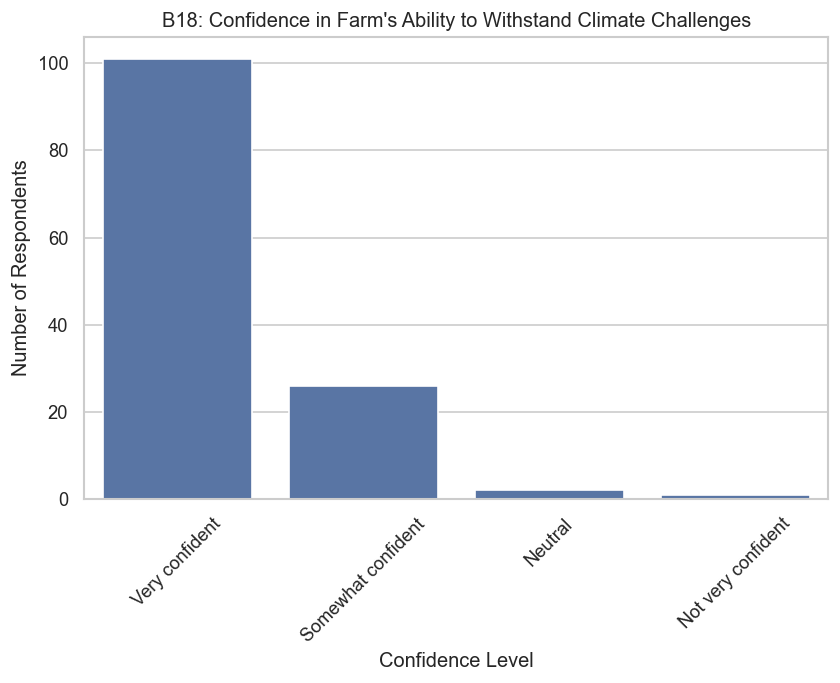


B19: Climate Impacts of Concern Distribution
                                          Frequency  Percent (%)
climate_worry                                                   
Erratic rainfall / Unpredictable seasons         36    27.692308
Prolonged drought                                32    24.615385
I am not worried about any                       29    22.307692
New pests and diseases                           21    16.153846
Floods / Waterlogging                             6     4.615385
High temperatures / Heat stress on crops          3     2.307692
Other                                             3     2.307692


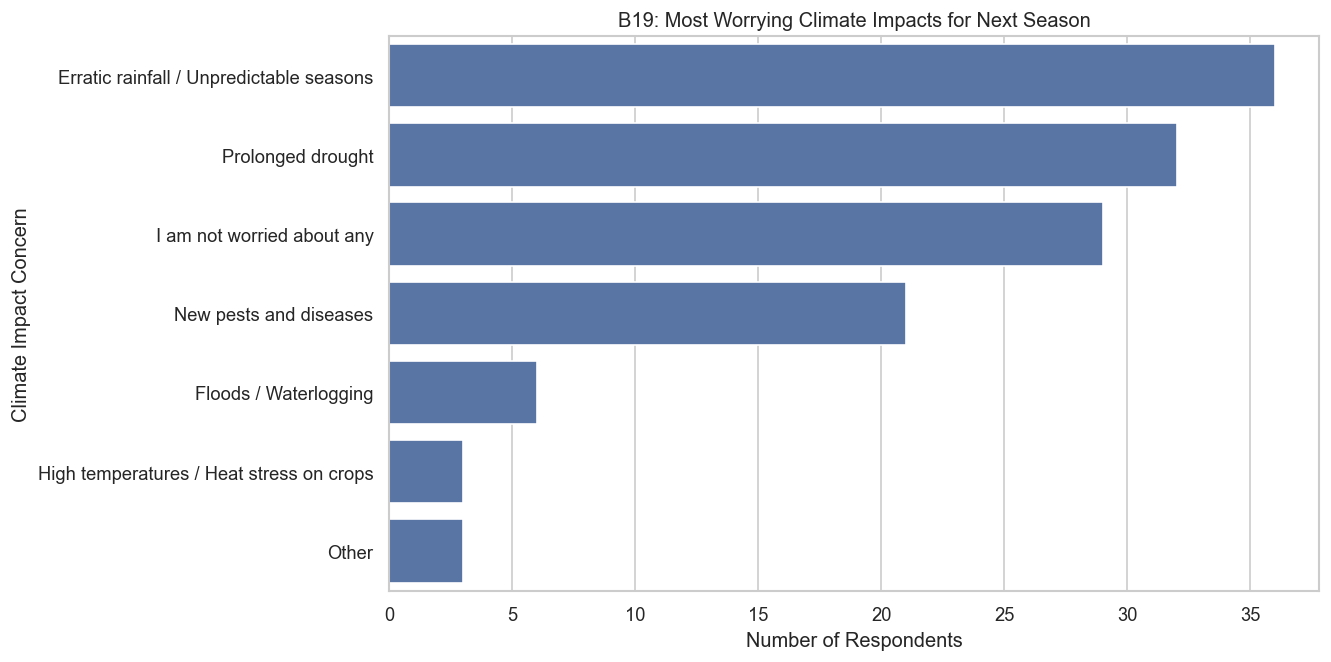


Cross-tabulation: Future Confidence vs Preparedness
climate_preparedness  Less prepared   Much better prepared  Somewhat better prepared  The same level of preparedness  All
future_confidence                                                                                                        
Neutral                            0                     0                         2                               0    2
Not very confident                 1                     0                         0                               0    1
Somewhat confident                 1                     3                        21                               1   26
Very confident                     0                    91                         9                               1  101
All                                2                    94                        32                               2  130

B19 Concerns by Gender
gender                                    Female  Male  All
climate_w

In [158]:
# ---- B18: Future Confidence ----
# Frequency distribution
b18_counts = df['future_confidence'].value_counts(dropna=False)
b18_percent = df['future_confidence'].value_counts(normalize=True, dropna=False) * 100
b18_summary = pd.DataFrame({'Frequency': b18_counts, 'Percent (%)': b18_percent})
print("B18: Future Confidence Distribution")
print(b18_summary)

# Optional: Plot B18 distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='future_confidence', order=df['future_confidence'].value_counts().index)
plt.xticks(rotation=45)
plt.title("B18: Confidence in Farm's Ability to Withstand Climate Challenges")
plt.xlabel("Confidence Level")
plt.ylabel("Number of Respondents")
plt.show()

# ---- B19: Climate Impacts of Concern ----
# Frequency distribution
b19_counts = df['climate_worry'].value_counts(dropna=False)
b19_percent = df['climate_worry'].value_counts(normalize=True, dropna=False) * 100
b19_summary = pd.DataFrame({'Frequency': b19_counts, 'Percent (%)': b19_percent})
print("\nB19: Climate Impacts of Concern Distribution")
print(b19_summary)

# Optional: Plot B19 top concerns
plt.figure(figsize=(10,6))
sns.barplot(y=b19_summary.index, x='Frequency', data=b19_summary.sort_values('Frequency', ascending=False))
plt.title("B19: Most Worrying Climate Impacts for Next Season")
plt.xlabel("Number of Respondents")
plt.ylabel("Climate Impact Concern")
plt.show()

# ---- Optional Cross-tab: Confidence vs Preparedness ----
if 'climate_preparedness' in df.columns:
    cross_tab = pd.crosstab(df['future_confidence'], df['climate_preparedness'], margins=True)
    print("\nCross-tabulation: Future Confidence vs Preparedness")
    print(cross_tab)

# ---- Optional Cross-tab: Concerns by Gender ----
if 'gender' in df.columns:
    b19_gender = pd.crosstab(df['climate_worry'], df['gender'], margins=True)
    print("\nB19 Concerns by Gender")
    print(b19_gender)

### Phase 3 — EQ3 (Relevance) & EQ4 (Community-Level Change) Analysis 

In [71]:
# Phase 3 — EQ3 (Relevance) & EQ4 (Community-Level Change) Analysis
# Produces: Excel workbook, PNG & SVG charts, and a single master TXT summary for "Relevance" section.
# Author: ChatGPT (Vincent's ECCRAS analysis helper)
# Run requirements: pandas, numpy, matplotlib, seaborn, openpyxl, xlsxwriter

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import fill

# ----------------------------
# CONFIG
# ----------------------------
input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\DESECE_ECCRAS_Raw_Filtered.csv"
output_folder = r"C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis"
os.makedirs(output_folder, exist_ok=True)

excel_output = os.path.join(output_folder, "Phase3_Relevance_and_CommunityChange.xlsx")
txt_output = os.path.join(output_folder, "Phase3_Relevance_Summaries.txt")

# charts
heatmap_png = os.path.join(output_folder, "Adoption_by_BiggestProblem_heatmap.png")
heatmap_svg = os.path.join(output_folder, "Adoption_by_BiggestProblem_heatmap.svg")
training_bar_png = os.path.join(output_folder, "Training_Relevance_Bar.png")
peerstack_png = os.path.join(output_folder, "Peer_to_Peer_StackedBar.png")
adoption_top5_png = os.path.join(output_folder, "Top5_Practices_Adoption.png")

# ----------------------------
# LOAD DATA
# ----------------------------
df = pd.read_csv(input_file, encoding='ISO-8859-1')

# Drop variables user asked to exclude if present
drop_cols = ['enumerator_name', 'consent_form_url', 'location_full', 'location_altitude',
             'location_longitude', '_Record your current location_altitude', 'location_precision', 'Closing']
for c in drop_cols:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

# Ensure column names are exactly the ones you specified (no accidental spaces)
df.columns = [c.strip() for c in df.columns]

# ----------------------------
# UTILITIES / Normalization
# ----------------------------
def binarize(col):
    """
    Convert 'Yes/No', 'yes/no', '1/0', True/False to 1/0.
    Returns numeric series with NaN preserved.
    """
    ser = df[col].copy().astype(str).str.strip().str.lower()
    ser = ser.replace({'nan': np.nan, 'none': np.nan, '': np.nan})
    mapping = {'yes':1, 'y':1, '1':1, 'true':1, 't':1, 'no':0, 'n':0, '0':0, 'false':0, 'f':0}
    return ser.map(mapping)

# List of adoption indicator columns (B1/B3 adoptions as available in dataset)
adoption_cols = [
    'agroforestry_adopted',
    'drought_varieties_adopted',
    'crop_rotation_adopted',
    'mulching_adopted',
    'composting_adopted',
    'water_harvesting_adopted',
    'drip_irrigation_adopted',
    'kitchen_garden_adopted',
    'food_forest_adopted',
    'soil_conservation_adopted'
]

# Keep only adoption columns that are actually present (defensive)
adoption_cols = [c for c in adoption_cols if c in df.columns]

# B20 (enablers) and B21 (barriers) are often multi-select encoded as separate columns like enabler_training, enabler_demo, etc.
enabler_cols = [c for c in df.columns if c.startswith('enabler_') and c not in ('enabler_other','enabler_other.1')]
barrier_cols = [c for c in df.columns if c.startswith('barrier_') and not c.endswith('other')]

# Key columns for relevance mapping
biggest_problem_col = 'biggest_problem'         # C1
problem_addressed_col = 'problem_addressed'     # C2
training_relevance_col = 'training_relevance'   # C3
more_farmers_col = 'more_farmers_adopting'      # B7
shared_knowledge_col = 'shared_knowledge'       # C4
neighbors_copy_col = 'neighbors_copy'           # C5

# Ensure any missing key columns are handled
for col in [biggest_problem_col, problem_addressed_col, training_relevance_col,
            more_farmers_col, shared_knowledge_col, neighbors_copy_col]:
    if col not in df.columns:
        df[col] = np.nan

# ----------------------------
# Create numeric adoption indicators (0/1)
# ----------------------------
for c in adoption_cols:
    df[c + '_bin'] = binarize(c)   # e.g., 'agroforestry_adopted_bin'

adoption_bin_cols = [c + '_bin' for c in adoption_cols]

# Adoption score = sum of binarized adoption indicators (treat missing as 0 for score)
df['Adoption_Score'] = df[adoption_bin_cols].fillna(0).sum(axis=1).astype(int)

# Create AgeGroup if 'age' is already categories like '46-55' etc.
if 'age' in df.columns:
    # trim whitespace
    df['age'] = df['age'].astype(str).str.strip()
    # keep as categorical
    df['Age Group'] = df['age']

# ----------------------------
# 1) Cross-tabulate Biggest Problem (C1) with How Well Addressed (C2)
# ----------------------------
ct_problem_addressed = pd.crosstab(df[biggest_problem_col].fillna('Missing'),
                                   df[problem_addressed_col].fillna('Missing'),
                                   margins=True,
                                   normalize='index') * 100
ct_problem_addressed_counts = pd.crosstab(df[biggest_problem_col].fillna('Missing'),
                                   df[problem_addressed_col].fillna('Missing'),
                                   margins=True)

# ----------------------------
# 2) For each Biggest Problem, compute adoption rates for each practice (heatmap)
# ----------------------------
# We'll compute percent adopting (among respondents who gave that biggest_problem)
pivot = {}
for idx_val, grp in df.groupby(df[biggest_problem_col].fillna('Missing')):
    # percent adopting each practice among the group (ignore NaN adoption)
    pct = grp[adoption_bin_cols].mean(skipna=True) * 100
    pivot[idx_val] = pct

adoption_by_problem = pd.DataFrame(pivot).T.fillna(0)  # rows = biggest_problem, cols = practice_bin

# Rename columns to pretty practice names for heatmap labels
pretty_map = {c+'_bin': c.replace('_adopted','').replace('_',' ').title() for c in adoption_cols}
adoption_by_problem.rename(columns=pretty_map, inplace=True)

# ----------------------------
# 3) Training Relevance distribution (C3)
# ----------------------------
training_counts = df[training_relevance_col].fillna('Missing').value_counts(dropna=False)
training_pct = (training_counts / training_counts.sum()) * 100

# ----------------------------
# 4) Peer-to-peer measures: B7 (more_farmers_adopting), C4 (shared_knowledge), C5 (neighbors_copy)
# ----------------------------
peer_cols = []
for col in [more_farmers_col, shared_knowledge_col, neighbors_copy_col]:
    if col in df.columns:
        peer_cols.append(col)
    else:
        df[col] = np.nan
        peer_cols.append(col)

peer_summary = {}
for col in peer_cols:
    vc = df[col].fillna('Missing').value_counts()
    pct = (vc / vc.sum()) * 100
    peer_summary[col] = pd.concat([vc, pct], axis=1)
    peer_summary[col].columns = ['count','proportion']

# ----------------------------
# 5) Top 5 adopted practices overall
# ----------------------------
overall_adoption_pct = df[adoption_bin_cols].mean(skipna=True).rename(index=lambda x: x.replace('_bin',''))
overall_adoption_pct.index = overall_adoption_pct.index.str.replace('_adopted','').str.replace('_',' ').str.title()
overall_adoption_pct = (overall_adoption_pct * 100).sort_values(ascending=False)
top5_practices = overall_adoption_pct.head(5)

# ----------------------------
# EXPORT: Excel workbook with sheets
# ----------------------------
with pd.ExcelWriter(excel_output, engine='xlsxwriter') as writer:
    # Summary sheet
    summary = pd.DataFrame({
        'Metric': [
            'Total respondents (filtered)',
            'Number with non-missing Biggest Problem',
            'Number with non-missing Training Relevance'
        ],
        'Value': [
            len(df),
            df[biggest_problem_col].notna().sum(),
            df[training_relevance_col].notna().sum()
        ]
    })
    summary.to_excel(writer, sheet_name='Summary', index=False)

    # Problem vs Addressed (percent)
    ct_problem_addressed.round(2).to_excel(writer, sheet_name='C1_vs_C2_pct')
    ct_problem_addressed_counts.to_excel(writer, sheet_name='C1_vs_C2_counts')

    # Adoption by problem (heatmap data)
    adoption_by_problem.round(2).to_excel(writer, sheet_name='Adoption_by_BiggestProblem')

    # Training relevance
    pd.DataFrame({'count': training_counts, 'percent': training_pct.round(2)}).to_excel(writer, sheet_name='Training_Relevance')

    # Peer-to-peer sheets
    for col in peer_cols:
        peer_summary[col].round(2).to_excel(writer, sheet_name=f'Peer_{col}'[:31])

    # Top practices
    top5_practices.round(2).to_frame('Percent_Adoption').to_excel(writer, sheet_name='Top5_Practices')

    # Adoption score summary
    df['Adoption_Score'].describe().to_frame('Adoption_Score').to_excel(writer, sheet_name='Adoption_Score_Summary')

    # Enablers & Barriers counts if present
    if enabler_cols:
        enab_counts = pd.DataFrame({c: binarize(c).value_counts(dropna=True) for c in enabler_cols}).fillna(0).T
        enab_counts.columns = ['0','1'] if {'0','1'}.issubset(set(enab_counts.columns.astype(str))) else enab_counts.columns
        enab_counts.to_excel(writer, sheet_name='Enabler_counts')
    if barrier_cols:
        barr_counts = pd.DataFrame({c: binarize(c).value_counts(dropna=True) for c in barrier_cols}).fillna(0).T
        barr_counts.to_excel(writer, sheet_name='Barrier_counts')

# ----------------------------
# PLOT 1: Heatmap — Adoption by Biggest Problem
# ----------------------------
plt.figure(figsize=(12, max(4, 0.4*adoption_by_problem.shape[0])))
sns.set(style='whitegrid')
ax = sns.heatmap(adoption_by_problem,
                 cmap='YlGnBu',
                 annot=True,
                 fmt=".1f",
                 cbar_kws={'label': 'Percent Adopting (%)'},
                 linewidths=.5)
ax.set_title("Percent Adopting Each Practice — grouped by Biggest Problem (C1)")
ax.set_xlabel("Practice")
ax.set_ylabel("Biggest Problem Reported (C1)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(heatmap_png, dpi=300)
plt.savefig(heatmap_svg)
plt.close()

# ----------------------------
# PLOT 2: Training Relevance Bar Chart
# ----------------------------
plt.figure(figsize=(8,5))
training_pct.sort_values(ascending=True).plot(kind='barh')
plt.title("Training Relevance — Distribution of responses (C3)")
plt.xlabel("Percent (%) of respondents")
plt.ylabel("Training relevance response")
plt.tight_layout()
plt.savefig(training_bar_png, dpi=300)
plt.close()

# ----------------------------
# PLOT 3: Peer-to-peer stacked bars (B7, C4, C5)
# ----------------------------
# We'll show top categories (Yes/No/Other) stacked
peer_plot_df = pd.DataFrame()
for col in peer_cols:
    vc = df[col].fillna('Missing').value_counts()
    peer_plot_df[col] = vc

peer_plot_df = peer_plot_df.fillna(0)
peer_plot_df = peer_plot_df.apply(lambda x: x / x.sum() * 100)  # percent

# For stacked bar we need the index to be categories common across columns
peer_plot_df = peer_plot_df.fillna(0)
peer_plot_df.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Peer-to-peer indicators (percent stacked) — More farmers / Shared knowledge / Neighbours copying")
plt.xlabel("Indicator")
plt.ylabel("Percent (%)")
plt.legend(title='Response', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.savefig(peerstack_png, dpi=300)
plt.close()

# ----------------------------
# PLOT 4: Top 5 Practices — Bar chart
# ----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=top5_practices.values, y=top5_practices.index)
plt.xlabel('Percent adopting (%)')
plt.title('Top 5 Climate-resilient Practices by adoption rate (overall)')
plt.xlim(0,100)
plt.tight_layout()
plt.savefig(adoption_top5_png, dpi=300)
plt.close()

# ----------------------------
# TXT summary (single master for Relevance)
# ----------------------------
with open(txt_output, 'w', encoding='utf-8') as f:
    f.write("PHASE 3 — EQ3 (Relevance) & EQ4 (Community-level change) SUMMARY\n")
    f.write("="*80 + "\n\n")

    f.write("1) Sample & housekeeping\n")
    f.write(f"- Total respondents in filtered dataset: {len(df)}\n")
    f.write(f"- Adoption score: mean={df['Adoption_Score'].mean():.2f}, median={df['Adoption_Score'].median():.0f}, max={int(df['Adoption_Score'].max())}\n\n")

    f.write("2) C1 (Biggest Problem) x C2 (How well addressed) — Percentage by Biggest Problem\n")
    f.write("(Rows = Biggest Problem, Columns = How well addressed)\n")
    f.write(ct_problem_addressed.round(2).to_string())
    f.write("\n\nCounts table\n")
    f.write(ct_problem_addressed_counts.to_string())
    f.write("\n\n")

    f.write("Interpretation notes (auto-generated hints):\n")
    f.write("- Look for problem rows where 'Very well' or 'Well' are high: these indicate problems perceived as addressed by project activities.\n")
    f.write("- Rows where 'Not at all' or 'Poorly' dominate indicate gaps.\n\n")

    f.write("3) Adoption by Biggest Problem — percent adopting each practice (heatmap data) \n")
    f.write("Top rows (first 6 shown):\n")
    f.write(adoption_by_problem.round(1).head(6).to_string())
    f.write("\n\n")
    f.write("Interpretation notes:\n")
    f.write("- The heatmap image 'Adoption_by_BiggestProblem_heatmap.png' shows which practices are preferentially adopted by people reporting particular problems.\n")
    f.write("- Example: if 'Unreliable rainfall' row shows high values for 'Water Harvesting' and 'Drip Irrigation', the project is aligned with that need.\n\n")

    f.write("4) Training relevance (C3) distribution (counts and percent):\n")
    f.write(pd.DataFrame({'count': training_counts, 'percent': training_pct.round(1)}).to_string())
    f.write("\n\n")

    f.write("5) Peer-to-peer indicators (B7, C4, C5): counts & % (these are in Excel sheets 'Peer_*')\n")
    for col in peer_cols:
        f.write("\n---\n")
        f.write(f"{col} distribution:\n")
        f.write(peer_summary[col].round(1).to_string())
        f.write("\n")

    f.write("\n6) Top 5 practices overall (percent adopting):\n")
    f.write(top5_practices.round(1).to_string())
    f.write("\n\n")

    f.write("FILES WRITTEN (folder):\n")
    f.write(f"- Excel workbook: {excel_output}\n")
    f.write(f"- Heatmap (PNG / SVG): {heatmap_png} , {heatmap_svg}\n")
    f.write(f"- Training relevance bar chart: {training_bar_png}\n")
    f.write(f"- Peer stacked bar: {peerstack_png}\n")
    f.write(f"- Top5 adoption bar: {adoption_top5_png}\n")
    f.write(f"- This TXT summary: {txt_output}\n\n")

    f.write("END OF RELEVANCE SECTION SUMMARY\n")

# ----------------------------
# FINISH: Print quick console summary
# ----------------------------
print("Phase 3 (Relevance) outputs written to:")
print("  Excel:", excel_output)
print("  TXT summary:", txt_output)
print("  Heatmap PNG:", heatmap_png)
print("  Heatmap SVG:", heatmap_svg)
print("  Training bar PNG:", training_bar_png)
print("  Peer stacked bar PNG:", peerstack_png)
print("  Top5 adoption PNG:", adoption_top5_png)
print("\nScript finished.")


Phase 3 (Relevance) outputs written to:
  Excel: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Phase3_Relevance_and_CommunityChange.xlsx
  TXT summary: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Phase3_Relevance_Summaries.txt
  Heatmap PNG: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Adoption_by_BiggestProblem_heatmap.png
  Heatmap SVG: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Adoption_by_BiggestProblem_heatmap.svg
  Training bar PNG: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Training_Relevance_Bar.png
  Peer stacked bar PNG: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Peer_to_Peer_StackedBar.png
  Top5 adoption PNG: C:\Users\Hp\Downloads\ECCRAS_EVALUATION_OUTPUTS\Phase3_Relevance_Analysis\Top5_Practices_Adoption.png

Script finished.


In [195]:
import pandas as pd

# ===============================
# EQ3: Relevance – Alignment with Needs
# ===============================

# --- C1: Biggest problem before project ---
c1_summary = df['biggest_problem'].value_counts(dropna=False).reset_index()
c1_summary.columns = ['Biggest Problem', 'Number of Respondents']
c1_summary['Percent (%)'] = (c1_summary['Number of Respondents'] / len(df) * 100).round(1)

# --- C2: How well project addressed the problem ---
c2_summary = df.groupby('biggest_problem')['problem_addressed'].value_counts(normalize=True).mul(100).round(1).rename('Percent (%)').reset_index()

# --- Link C1 & adoption of practices B1/B3a ---
# Example: rainwater harvesting adoption by problem
rainwater_adoption = df[df['rainwater_system']=='Yes'].groupby('biggest_problem').size().reset_index(name='Number Adopting')
rainwater_adoption['Percent of Problem Group (%)'] = round(rainwater_adoption['Number Adopting'] / df.groupby('biggest_problem').size().values * 100,1)

# --- C3: Training relevance ---
c3_summary = df['training_relevance'].value_counts(dropna=False).reset_index()
c3_summary.columns = ['Training Relevance', 'Number of Respondents']
c3_summary['Percent (%)'] = (c3_summary['Number of Respondents'] / len(df) * 100).round(1)

# ===============================
# EQ4: Relevance – Community-Level Change
# ===============================

# --- B7: More farmers using practices ---
b7_summary = df['more_farmers_adopting'].value_counts(dropna=False).reset_index()
b7_summary.columns = ['Observation of More Farmers', 'Number of Respondents']
b7_summary['Percent (%)'] = (b7_summary['Number of Respondents'] / len(df) * 100).round(1)

# --- C4: Knowledge sharing ---
c4_summary = df['shared_knowledge'].value_counts(dropna=False).reset_index()
c4_summary.columns = ['Shared Knowledge', 'Number of Respondents']
c4_summary['Percent (%)'] = (c4_summary['Number of Respondents'] / len(df) * 100).round(1)

# --- C5: Neighbors copying practices ---
c5_summary = df['neighbors_copy'].value_counts(dropna=False).reset_index()
c5_summary.columns = ['Neighbors Copying Practices', 'Number of Respondents']
c5_summary['Percent (%)'] = (c5_summary['Number of Respondents'] / len(df) * 100).round(1)

# ===============================
# Print summaries
# ===============================
print("\n--- C1: Biggest Problem Before Project ---\n", c1_summary)
print("\n--- C2: How Well Problem Addressed ---\n", c2_summary)
print("\n--- Rainwater Harvesting Adoption by Problem ---\n", rainwater_adoption)
print("\n--- C3: Training Relevance ---\n", c3_summary)
print("\n--- B7: More Farmers Using Practices ---\n", b7_summary)
print("\n--- C4: Shared Knowledge ---\n", c4_summary)
print("\n--- C5: Neighbors Copying Practices ---\n", c5_summary)



--- C1: Biggest Problem Before Project ---
                Biggest Problem  Number of Respondents  Percent (%)
0          Poor soil fertility                     59         30.3
1              Low crop yields                     46         23.6
2  Unreliable rainfall/Drought                     44         22.6
3               Lack of income                     25         12.8
4               Pests/Diseases                     12          6.2
5                        Other                      9          4.6

--- C2: How Well Problem Addressed ---
                 biggest_problem problem_addressed  Percent (%)
0                Lack of income         Very well         96.0
1                Lack of income     Not very well          4.0
2               Low crop yields         Very well         84.8
3               Low crop yields     Somewhat well         15.2
4                         Other         Very well         88.9
5                         Other        Not at all         11.1
6   

### Phase 3: (EQ 5 & 6) Impact & Sustainability / Likelihood of Continuation

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directories exist
os.makedirs("C:/Users/Hp/Downloads/ECCRAS_Evaluation_Final_Phase3/outputs/excel", exist_ok=True)
os.makedirs("C:/Users/Hp/Downloads/ECCRAS_Evaluation_Final_Phase3/outputs/graphs", exist_ok=True)
os.makedirs("C:/Users/Hp/Downloads/ECCRAS_Evaluation_Final_Phase3/outputs/txt", exist_ok=True)


# Load dataset
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\ECCRAS EVALUATION MANAGEMENT\\Analysis_Code_Output\\DESECE_ECCRAS_Raw_Filtered.csv")  # adjust path

# -----------------------------
# PHASE 3: Sustainability Analysis
# -----------------------------

# Define variable groups
perceived_effect_cols = [
    'compost_effect','manure_effect','cover_crops_effect','zero_tillage_effect',
    'crop_rotation_effect','rainwater_effect','drip_irrigation_effect','mulching_effect',
    'zai_pits_effect','drought_varieties_effect','early_varieties_effect','intercropping_effect',
    'kitchen_garden_effect','food_forest_effect','trees_effect','vegetation_strip_effect','IPM_effect'
]

continue_cols = ['continue_practice']  # Yes/No or 0/1
barrier_cols = [
    'barrier_continue_money','barrier_continue_equipment','barrier_continue_advice',
    'barrier_continue_market','barrier_continue_labor','barrier_continue_none','barrier_continue_other'
]
group_cols = ['group_functioning','group_plan']
advice_cols = ['advice_group','advice_gov','advice_agrodealer','advice_otherfarmers','advice_unknown','advice_other']

# Helper function to calculate percentage of positive responses
def positive_pct(col):
    if pd.api.types.is_numeric_dtype(df[col]):
        return (df[col]==1).sum() / len(df) * 100
    else:
        return (df[col].str.lower()=='yes').sum() / len(df) * 100

# -----------------------------
# 1. Perceived Benefit & Intent to Continue
# -----------------------------
benefit_summary = {}
for col in perceived_effect_cols:
    benefit_summary[col] = positive_pct(col)

benefit_df = pd.DataFrame.from_dict(benefit_summary, orient='index', columns=['% Positive Effect']).sort_values('% Positive Effect', ascending=False)
benefit_df.to_excel("outputs/excel/perceived_effect.xlsx")

# Cross-tab: Intent to continue vs. perceived effect
cross_tab = {}
for col in perceived_effect_cols:
    if 'continue_practice' in df.columns:
        cross_tab[col] = pd.crosstab(df[col], df['continue_practice'], normalize='index')*100

# Save text summary
with open("outputs/txt/sustainability_summary.txt", "w") as f:
    f.write("Perceived Benefit and Likelihood to Continue (% Positive Responses)\n")
    f.write(benefit_df.to_string())
    f.write("\n\nCross-tab: Perceived Effect vs Continue Practice\n")
    for k,v in cross_tab.items():
        f.write(f"\n\n{k}:\n{v.to_string()}")

# -----------------------------
# 2. Barriers to Sustainability
# -----------------------------
barrier_pct = {col: positive_pct(col) for col in barrier_cols}
barrier_df = pd.DataFrame.from_dict(barrier_pct, orient='index', columns=['% Respondents'])
barrier_df = barrier_df.sort_values('% Respondents', ascending=False)
barrier_df.to_excel("outputs/excel/barriers.xlsx")

# Plot Barriers
plt.figure(figsize=(10,6))
sns.barplot(data=barrier_df, x=barrier_df.index, y='% Respondents')
plt.title("Top Barriers to Sustainability")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/graphs/top_barriers.png")
plt.savefig("outputs/graphs/top_barriers.svg")
plt.close()

# -----------------------------
# 3. Group Functionality
# -----------------------------
group_pct = {col: positive_pct(col) for col in group_cols}
group_df = pd.DataFrame.from_dict(group_pct, orient='index', columns=['% Positive'])
group_df.to_excel("outputs/excel/group_functionality.xlsx")

# Plot Group Functionality
plt.figure(figsize=(6,4))
sns.barplot(data=group_df, x=group_df.index, y='% Positive')
plt.title("Group Functionality and Sustainability Plan")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/graphs/group_functionality.png")
plt.close()

# -----------------------------
# 4. Sources of Future Advice
# -----------------------------
advice_pct = {col: positive_pct(col) for col in advice_cols}
advice_df = pd.DataFrame.from_dict(advice_pct, orient='index', columns=['% Respondents']).sort_values('% Respondents', ascending=False)
advice_df.to_excel("outputs/excel/advice_sources.xlsx")

# Plot Advice Sources
plt.figure(figsize=(10,6))
sns.barplot(data=advice_df, x=advice_df.index, y='% Respondents')
plt.title("Sources of Future Advice for Sustainability")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/graphs/advice_sources.png")
plt.close()


In [119]:
# EFFICIENCY ANALYSIS SCRIPT (Phase 3 - Efficiency)
# Run in your environment after pasting. Adjust input_file path if needed.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# ---------- Paths ----------
input_file = r"C:\Users\Hp\Downloads\ECCRAS EVALUATION MANAGEMENT\Analysis_Code_Output\DESECE_ECCRAS_Raw_Filtered.csv"
out_base = r"C:\Users\Hp\Downloads\ECCRAS_Evaluation_Efficiency"
out_excel = os.path.join(out_base, "outputs", "excel")
out_graphs = os.path.join(out_base, "outputs", "graphs")
out_txt = os.path.join(out_base, "outputs", "txt")

os.makedirs(out_excel, exist_ok=True)
os.makedirs(out_graphs, exist_ok=True)
os.makedirs(out_txt, exist_ok=True)

# ---------- Utilities ----------
def safe_read_csv(path):
    try:
        return pd.read_csv(path, encoding='ISO-8859-1')
    except Exception as e:
        return pd.read_csv(path)

def numeric_col(series):
    # Convert to numeric where possible; preserve NaN
    return pd.to_numeric(series.astype(str).str.replace(',','').replace('', np.nan), errors='coerce')

def write_txt(filename, heading, content):
    with open(filename, "w", encoding='utf-8') as f:
        f.write(f"{heading}\n")
        f.write(f"Generated: {datetime.now().isoformat()}\n\n")
        f.write(content)

# ---------- Load data ----------
df = safe_read_csv(input_file)

# Standardize column names (keep original mapping visible)
df.columns = df.columns.str.strip()

# Helpful diagnostics
cols = set(df.columns.tolist())

# ---------- Define variables used in Efficiency analysis ----------
# Income vars (use these existing fields from your dataset)
income_before_var = 'est_income_2021'   # income in 2021 (before/project baseline)
income_after_var  = 'est_income_2025'   # income in 2025 (now)

# Adopted practices columns (common '..._adopted' fields from your list)
practice_adopt_cols = [
    'agroforestry_adopted','drought_varieties_adopted','crop_rotation_adopted',
    'mulching_adopted','composting_adopted','water_harvesting_adopted',
    'drip_irrigation_adopted','kitchen_garden_adopted','food_forest_adopted',
    'soil_conservation_adopted'
]
# Enablers and barriers (B20/B21) - typical variable names you provided
enabler_cols = [
    'enabler_training','enabler_project_support','enabler_demo','enabler_group_support',
    'enabler_results','enabler_inputs','enabler_other'
]
barrier_cols = [
    'barrier_cost','barrier_labor','barrier_knowledge','barrier_climate',
    'barrier_pests','barrier_water','barrier_conflict','barrier_challenges_other'
]

# Key demographics
gender_col = 'gender'
age_col = 'age'  # your age is categorical like '46-55' etc.
county_col = 'county_name'
sublocation_col = 'sublocation_bungoma_trans_nzoia'

# Key adoption-related/perception cols
perceived_effect_cols = [
    'compost_effect','manure_effect','cover_crops_effect','zero_tillage_effect',
    'crop_rotation_effect','rainwater_effect','drip_irrigation_effect','mulching_effect',
    'zai_pits_effect','drought_varieties_effect','early_varieties_effect','intercropping_effect',
    'kitchen_garden_effect','food_forest_effect','trees_effect','vegetation_strip_effect','IPM_effect'
]

# ---------- Check which of these exist ----------
def present(cols_list):
    return [c for c in cols_list if c in cols]

practices_present = present(practice_adopt_cols)
enablers_present = present(enabler_cols)
barriers_present = present(barrier_cols)
perceived_present = present(perceived_effect_cols)

# Log missing sets
missing = {
    'practices_missing': [c for c in practice_adopt_cols if c not in cols],
    'enablers_missing': [c for c in enabler_cols if c not in cols],
    'barriers_missing': [c for c in barrier_cols if c not in cols],
    'perceived_missing': [c for c in perceived_effect_cols if c not in cols],
    'income_before_missing': income_before_var not in cols,
    'income_after_missing': income_after_var not in cols
}

diag_text = "EFFICIENCY ANALYSIS - Data diagnostics\n\n"
diag_text += f"Total rows: {len(df)}\n"
diag_text += f"Practices found ({len(practices_present)}): {practices_present}\n"
diag_text += f"Enablers found ({len(enablers_present)}): {enablers_present}\n"
diag_text += f"Barriers found ({len(barriers_present)}): {barriers_present}\n"
diag_text += f"Perceived effect fields found ({len(perceived_present)}): {perceived_present}\n"
diag_text += "Missing flags:\n" + "\n".join([f"{k}: {v}" for k,v in missing.items()]) + "\n"

write_txt(os.path.join(out_txt, "00_diagnostics.txt"), "Diagnostics", diag_text)

# ---------- Create derived metrics ----------
# 1) Adoption score = count of 'Yes'/1 across adopted practice columns available
def is_yes(x):
    if pd.isna(x): return False
    s = str(x).strip().lower()
    return s in ('yes','y','1','true','t')

if practices_present:
    df['adoption_score'] = 0
    for c in practices_present:
        df[c+'_bool'] = df[c].apply(is_yes)
        df['adoption_score'] += df[c+'_bool'].astype(int)
else:
    df['adoption_score'] = np.nan

# 2) Income: coerce to numeric
if income_before_var in df.columns:
    df['income_before'] = numeric_col(df[income_before_var])
else:
    df['income_before'] = np.nan

if income_after_var in df.columns:
    df['income_after'] = numeric_col(df[income_after_var])
else:
    df['income_after'] = np.nan

# 3) Income change absolute and pct (where both exist)
df['income_change_absolute'] = df['income_after'] - df['income_before']
df['income_change_pct'] = (df['income_change_absolute'] / df['income_before'].replace({0:np.nan}))*100

# 4) Adopted any practice
df['adopted_any'] = df['adoption_score'].fillna(0) > 0

# 5) adoption buckets for stratified summaries
df['_adopt_bucket'] = pd.cut(df['adoption_score'].fillna(0),
                             bins=[-0.1,0,2,5,100],
                             labels=['0','1-2','3-5','6+'])

# ---------- Summaries & tests ----------
excel_writer = pd.ExcelWriter(os.path.join(out_excel, "efficiency_summary.xlsx"), engine='xlsxwriter')

# A. Basic descriptive tables
desc_tables = {}

# Adoption distribution
desc_tables['adoption_distribution'] = df['adoption_score'].value_counts(dropna=False).sort_index()

# Adoption by gender
if gender_col in df.columns:
    desc_tables['adoption_by_gender'] = pd.crosstab(df[gender_col].fillna('Unknown'), df['adopted_any']).apply(lambda r: r/r.sum()*100, axis=1)

# Mean adoption by county
if county_col in df.columns:
    desc_tables['mean_adoption_by_county'] = df.groupby(county_col)['adoption_score'].agg(['count','mean','median']).fillna('NA')

# Income summaries
income_present = df['income_before'].notna().sum() + df['income_after'].notna().sum()
desc_tables['income_summary_overall'] = df[['income_before','income_after','income_change_absolute','income_change_pct']].describe().T

# Save desc tables to Excel
for name, table in desc_tables.items():
    try:
        # convert Series -> DataFrame for Excel
        if isinstance(table, pd.Series):
            table = table.rename_axis(name).reset_index(name='value')
        table.to_excel(excel_writer, sheet_name=name[:31], index=True)
    except Exception as e:
        # fallback: write to TXT
        write_txt(os.path.join(out_txt, f"{name}.txt"), name, str(table))

# B. Wilcoxon signed-rank test for paired income (before vs after)
wilcox_result_text = ""
paired = df[['income_before','income_after']].dropna()
if len(paired) >= 5:
    try:
        w_stat, pval = stats.wilcoxon(paired['income_before'], paired['income_after'])
        wilcox_result_text = f"Wilcoxon signed-rank test on paired incomes (n={len(paired)}): W={w_stat:.3f}, p={pval:.5f}\n"
    except Exception as e:
        wilcox_result_text = f"Wilcoxon test failed: {e}\n"
else:
    wilcox_result_text = f"Not enough paired income observations for Wilcoxon (need >=5, have {len(paired)})\n"

# C. Spearman correlation between adoption_score and income change
corr_text = ""
if df['adoption_score'].notna().sum() >= 5 and df['income_change_absolute'].notna().sum() >= 5:
    try:
        valid = df[['adoption_score','income_change_absolute']].dropna()
        rho, p_rho = stats.spearmanr(valid['adoption_score'], valid['income_change_absolute'])
        corr_text = f"Spearman correlation between adoption_score and income_change_absolute (n={len(valid)}): rho={rho:.3f}, p={p_rho:.5f}\n"
    except Exception as e:
        corr_text = f"Spearman failed: {e}\n"
else:
    corr_text = "Not enough data for Spearman correlation (need >=5 non-missing pairs)\n"

# D. Chi-square tests: gender vs top practices (categorical)
chi_text = ""
if gender_col in df.columns and practices_present:
    for c in practices_present:
        try:
            # require at least 2x2 contingency
            tbl = pd.crosstab(df[gender_col].fillna('Unknown'), df[c].apply(lambda x: 'Yes' if is_yes(x) else 'No'))
            if tbl.shape[0] > 1 and tbl.shape[1] > 1:
                chi2, p, dof, ex = stats.chi2_contingency(tbl)
                chi_text += f"Chi-square: {c} by {gender_col} -> chi2={chi2:.3f}, p={p:.5f}, dof={dof}\n"
            else:
                chi_text += f"Skipping chi2 for {c}: contingency table not >=2x2\n"
        except Exception as e:
            chi_text += f"Chi2 error for {c}: {e}\n"
else:
    chi_text = "Chi-square tests skipped (missing gender or practice columns)\n"

# E. Efficiency proxy: income change per 1 additional adopted practice (median)
eff_text = ""
if df['adoption_score'].notna().sum() > 0 and df['income_change_absolute'].notna().sum() > 0:
    # group by adoption score and summarize median income change
    tmp = df[['adoption_score','income_change_absolute']].dropna().groupby('adoption_score').agg(['count','median','mean'])
    eff_text += "Income change by adoption_score (count, median, mean):\n" + tmp.to_string() + "\n"
else:
    eff_text += "Insufficient data for income_by_adoption summary\n"

# F. Enablers and barriers frequency (+ top lists)
enabler_text = ""
if enablers_present:
    en_df = pd.DataFrame({c: df[c].apply(lambda x: 1 if is_yes(x) else 0) if c in df.columns else 0 for c in enablers_present})
    en_freq = en_df.sum().sort_values(ascending=False)
    enabler_text += "Enabler frequencies (count of 'Yes'):\n" + en_freq.to_string() + "\n"
else:
    enabler_text += "No enabler columns available.\n"

barrier_text = ""
if barriers_present:
    bar_df = pd.DataFrame({c: df[c].apply(lambda x: 1 if is_yes(x) else 0) if c in df.columns else 0 for c in barriers_present})
    bar_freq = bar_df.sum().sort_values(ascending=False)
    barrier_text += "Barrier frequencies (count of 'Yes'):\n" + bar_freq.to_string() + "\n"
else:
    barrier_text += "No barrier columns available.\n"

# ---------- Write textual summary outputs ----------
master_content = diag_text + "\n\nWILCOXON RESULT:\n" + wilcox_result_text + "\n\nSPEARMAN:\n" + corr_text + "\n\nCHI-SQUARES:\n" + chi_text + "\n\nEFFICIENCY PROXIES:\n" + eff_text + "\n\nENABLERS:\n" + enabler_text + "\n\nBARRIERS:\n" + barrier_text
write_txt(os.path.join(out_txt, "efficiency_master_summary.txt"), "Efficiency Master Summary", master_content)

# save smaller pieces too
write_txt(os.path.join(out_txt, "wilcoxon_result.txt"), "Wilcoxon", wilcox_result_text)
write_txt(os.path.join(out_txt, "spearman_result.txt"), "Spearman", corr_text)
write_txt(os.path.join(out_txt, "chi_square_results.txt"), "ChiSquares", chi_text)
write_txt(os.path.join(out_txt, "enabler_freq.txt"), "Enablers", enabler_text)
write_txt(os.path.join(out_txt, "barrier_freq.txt"), "Barriers", barrier_text)

# Save summary tables to Excel as well
try:
    # adoption distribution
    desc_tables['adoption_distribution'].to_excel(excel_writer, sheet_name='adoption_distribution')
except:
    pass

try:
    if 'adoption_by_gender' in desc_tables:
        desc_tables['adoption_by_gender'].to_excel(excel_writer, sheet_name='adoption_by_gender')
except:
    pass

try:
    df[['adoption_score','adopted_any','_adopt_bucket','income_before','income_after','income_change_absolute','income_change_pct']].to_excel(excel_writer, sheet_name='person_level', index=False)
except:
    pass

# Finalize Excel workbook properly
excel_writer.close()


# ---------- Plots ----------
sns.set(style="whitegrid")

# 1) Adoption score distribution histogram
plt.figure(figsize=(8,5))
if df['adoption_score'].notna().sum() > 0:
    sns.histplot(df['adoption_score'].dropna(), bins=range(0, int(df['adoption_score'].max() if not np.isnan(df['adoption_score'].max()) else 6)+2), kde=False)
    plt.title("Distribution of Adoption Scores (Count of Practices Adopted)")
    plt.xlabel("Adoption Score (number of practices adopted)")
    plt.ylabel("Number of respondents")
    plt.savefig(os.path.join(out_graphs, "adoption_score_hist.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "adoption_score_hist.svg"))
    plt.close()
else:
    plt.close()

# 2) Top 5 practices adopted (bar chart)
if practices_present:
    # compute percent yes per practice
    pct_yes = {}
    for c in practices_present:
        yes_count = df[c].apply(lambda x: 1 if is_yes(x) else 0).sum()
        pct_yes[c] = yes_count / len(df) * 100
    pct_series = pd.Series(pct_yes).sort_values(ascending=False)
    top5 = pct_series.head(5)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top5.values, y=top5.index)
    plt.xlabel("Percent of respondents who adopted ( % )")
    plt.title("Top 5 Adopted Practices (Percent of respondents)")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "top5_practices.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "top5_practices.svg"))
    plt.close()

# 3) Adoption heatmap by County x Practice (percent)
if practices_present and county_col in df.columns:
    heat = pd.DataFrame(index=sorted(df[county_col].dropna().unique()))
    for c in practices_present:
        heat[c] = df.groupby(county_col)[c].apply(lambda s: s.apply(is_yes).sum() / len(s) * 100)
    plt.figure(figsize=(10, max(3, heat.shape[0]*0.8)))
    sns.heatmap(heat.fillna(0), annot=True, fmt=".1f", cbar_kws={'label':'% adopted'})
    plt.title("Adoption heatmap: County vs Practice (% adopted)")
    plt.ylabel("Name of the County")
    plt.xlabel("Practice (adopted)")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "adoption_heatmap_county.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "adoption_heatmap_county.svg"))
    plt.close()

# 4) Boxplot: income_after by adoption buckets
if 'income_after' in df.columns and df['income_after'].notna().sum() > 4:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='_adopt_bucket', y='income_after', data=df)
    plt.title("Distribution of Estimated Income (2025) by Adoption Bucket")
    plt.xlabel("Adoption Bucket (number of practices adopted)")
    plt.ylabel("Estimated Income (2025) - Ksh")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "income_by_adoption_bucket.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "income_by_adoption_bucket.svg"))
    plt.close()

# 5) Boxplot: income_change_absolute by adopted_any (Yes/No)
if 'income_change_absolute' in df.columns and df['income_change_absolute'].notna().sum() > 4:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='adopted_any', y='income_change_absolute', data=df.replace({True:'Yes', False:'No'}))
    plt.title("Income Change (2025 - 2021) by Whether respondent adopted any practice")
    plt.xlabel("Adopted any practice")
    plt.ylabel("Income change absolute (Ksh)")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "incomechange_by_adopt_any.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "incomechange_by_adopt_any.svg"))
    plt.close()

# 6) Top enablers and top barriers bar charts
if enablers_present:
    en_counts = pd.Series({c: df[c].apply(lambda x: 1 if is_yes(x) else 0).sum() for c in enablers_present}).sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=en_counts.values, y=en_counts.index)
    plt.title("Top Enablers Reported (counts)")
    plt.xlabel("Count (Yes)")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "top_enablers.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "top_enablers.svg"))
    plt.close()

if barriers_present:
    bar_counts = pd.Series({c: df[c].apply(lambda x: 1 if is_yes(x) else 0).sum() for c in barriers_present}).sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=bar_counts.values, y=bar_counts.index)
    plt.title("Top Barriers Reported (counts)")
    plt.xlabel("Count (Yes)")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "top_barriers.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "top_barriers.svg"))
    plt.close()

# 7) Scatter: adoption_score vs income_change_absolute with regression line
if df['adoption_score'].notna().sum() > 4 and df['income_change_absolute'].notna().sum() > 4:
    sc_df = df[['adoption_score','income_change_absolute']].dropna()
    plt.figure(figsize=(7,5))
    sns.regplot(x='adoption_score', y='income_change_absolute', data=sc_df, scatter_kws={'s':30})
    plt.title("Adoption Score vs Income Change (Ksh)")
    plt.xlabel("Adoption Score")
    plt.ylabel("Income change absolute (Ksh)")
    plt.tight_layout()
    plt.savefig(os.path.join(out_graphs, "adoption_vs_incomechange.png"), dpi=150)
    plt.savefig(os.path.join(out_graphs, "adoption_vs_incomechange.svg"))
    plt.close()

# ---------- Final small report saved to excel: adoption by gender & county + enablers/barriers ----------
with pd.ExcelWriter(os.path.join(out_excel, "efficiency_tables_extra.xlsx")) as writer:
    try:
        if gender_col in df.columns:
            pd.crosstab(df[gender_col].fillna('Unknown'), df['adopted_any']).to_excel(writer, sheet_name='adopt_by_gender')
    except:
        pass
    try:
        if county_col in df.columns:
            df.groupby(county_col)['adoption_score'].agg(['count','mean','median']).to_excel(writer, sheet_name='adopt_by_county')
    except:
        pass
    try:
        if enablers_present:
            pd.DataFrame(en_counts).rename(columns={0:'count'}).to_excel(writer, sheet_name='enabler_counts')
    except:
        pass
    try:
        if barriers_present:
            pd.DataFrame(bar_counts).rename(columns={0:'count'}).to_excel(writer, sheet_name='barrier_counts')
    except:
        pass
    # person level small table
    try:
        df[['respondent_name', gender_col, county_col, '_adopt_bucket', 'adoption_score', 'income_before', 'income_after', 'income_change_absolute']].to_excel(writer, sheet_name='person_level_small', index=False)
    except:
        pass

# ---------- DONE ----------
print("EFFICIENCY analysis complete.")
print("Outputs written to:")
print(" - Excel summaries:", out_excel)
print(" - Graphs:", out_graphs)
print(" - TXT summaries:", out_txt)


EFFICIENCY analysis complete.
Outputs written to:
 - Excel summaries: C:\Users\Hp\Downloads\ECCRAS_Evaluation_Efficiency\outputs\excel
 - Graphs: C:\Users\Hp\Downloads\ECCRAS_Evaluation_Efficiency\outputs\graphs
 - TXT summaries: C:\Users\Hp\Downloads\ECCRAS_Evaluation_Efficiency\outputs\txt


## Efficiency Analysis for ECCRAS — Phase: Efficiency (OECD-DAC)

In [205]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\ECCRAS EVALUATION MANAGEMENT\\Analysis_Code_Output\\DESECE_ECCRAS_Raw_Filtered.csv")

# List of adoption indicator variables
adoption_vars = [
    'agroforestry_adopted', 'drought_varieties_adopted', 'crop_rotation_adopted',
    'mulching_adopted', 'composting_adopted', 'water_harvesting_adopted',
    'drip_irrigation_adopted', 'kitchen_garden_adopted', 'soil_conservation_adopted'
]

# Recode Yes/No to 1/0
df[adoption_vars] = df[adoption_vars].replace({'Yes': 1, 'No': 0})

# Adoption Summary
adoption_summary = (
    df[adoption_vars]
    .sum()
    .reset_index()
)
adoption_summary.columns = ['Practice', 'Number Adopting']
adoption_summary['Percent (%)'] = (adoption_summary['Number Adopting'] / len(df) * 100).round(1)

print("=== PRACTICE ADOPTION SUMMARY ===")
print(adoption_summary)

# Efficiency of Training Sources
knowledge_sources = [
    'source_demo_DESECE', 'source_training_DESECE', 'source_training_otherNGO',
    'source_gov_officer', 'source_media', 'source_family', 'source_neighbour'
]

knowledge_summary = (
    df[knowledge_sources]
    .apply(lambda x: x.replace({'Yes': 1, 'No': 0}))
    .sum()
    .reset_index()
)

knowledge_summary.columns = ['Knowledge Source', 'Number of Respondents']
knowledge_summary['Percent (%)'] = (knowledge_summary['Number of Respondents'] / len(df) * 100).round(1)

print("\n=== KNOWLEDGE SOURCES (Training Efficiency) ===")
print(knowledge_summary)

# Intensity of Use Variables
intensity_vars = {
    'compost_use_bags_quantity_per_season': 'Compost (bags/season)',
    'manure_use_bags_quantity_per_season': 'Manure (bags/season)',
    'acres_under_cover_crops': 'Cover Crops (acres)',
    'zero_tillage_acres_under_cover': 'Zero Tillage (acres)',
    'acres_under_crop_rotation': 'Crop Rotation (acres)'
}

intensity_summary = df[list(intensity_vars.keys())].mean().reset_index()
intensity_summary.columns = ['Practice/Resource Use', 'Average Quantity/Area']
intensity_summary['Practice/Resource Use'] = intensity_summary['Practice/Resource Use'].map(intensity_vars)

print("\n=== INTENSITY / SCALE OF USE SUMMARY ===")
print(intensity_summary)

# Perceived Effectiveness (select columns ending in _effect)
effect_cols = [c for c in df.columns if c.endswith('_effect')]

effect_summary = df[effect_cols].apply(lambda x: x.value_counts(normalize=True)*100).round(1)
print("\n=== PERCEIVED EFFECTIVENESS OF PRACTICES ===")
print(effect_summary)

# Continuation of practices
continuation_summary = (
    df['continue_practice']
    .value_counts(normalize=True)*100
).round(1).reset_index()

continuation_summary.columns = ['Response', 'Percent (%)']

print("\n=== CONTINUATION OF PRACTICES (Sustainability Indicator) ===")
print(continuation_summary)


=== PRACTICE ADOPTION SUMMARY ===
                    Practice  Number Adopting  Percent (%)
0       agroforestry_adopted            127.0         97.7
1  drought_varieties_adopted            118.0         90.8
2      crop_rotation_adopted            129.0         99.2
3           mulching_adopted            117.0         90.0
4         composting_adopted            129.0         99.2
5   water_harvesting_adopted            130.0        100.0
6    drip_irrigation_adopted             98.0         75.4
7     kitchen_garden_adopted            129.0         99.2
8  soil_conservation_adopted            121.0         93.1

=== KNOWLEDGE SOURCES (Training Efficiency) ===
           Knowledge Source  Number of Respondents  Percent (%)
0        source_demo_DESECE                    4.0          3.1
1    source_training_DESECE                  126.0         96.9
2  source_training_otherNGO                    0.0          0.0
3        source_gov_officer                    3.0          2.3
4      

## EQ5 & 6 SUSTAINALITY -EQ 5 & 6: Sustainability - Likelihood of Continuation

### EQ 5 & 6: Sustainability - Likelihood of Continuation

In [209]:
import pandas as pd

# -------------------------------
# 1. Perceived Benefit & Intent to Continue (D1 & D2)
# -------------------------------
# Cross-tabulate perceived benefit (better_than_old) with intention to continue (continue_practice)
continuation_crosstab = pd.crosstab(df['better_than_old'], df['continue_practice'], margins=True, normalize='all') * 100
continuation_crosstab = continuation_crosstab.round(1)

print("=== Cross-tab: Perceived Benefit vs Intent to Continue ===")
print(continuation_crosstab)

# Calculate overall % of respondents who find practices better and definitely continue
better_and_definitely = df[(df['better_than_old'] == 'Yes') & (df['continue_practice'] == 'Definitely yes')]
percent_better_definitely = (len(better_and_definitely) / len(df)) * 100
print(f"\nPercentage of respondents who find practices better and definitely plan to continue: {percent_better_definitely:.1f}%")

# -------------------------------
# 2. Identify Risks to Sustainability (D3 & D6)
# -------------------------------
# Barriers to continuation (D3) - multiple selections possible, separated by commas
# Flatten into individual barriers
barriers_series = df['barrier_continue_list'].dropna().str.split(',').explode().str.strip()
barrier_freq = barriers_series.value_counts(normalize=True).mul(100).round(1)
print("\n=== Risks to Sustainability: Barriers to Continuation ===")
print(barrier_freq)

# Sources of future advice (D6) - multiple selections possible
advice_series = df['sources_of_advice_list'].dropna().str.split(',').explode().str.strip()
advice_freq = advice_series.value_counts(normalize=True).mul(100).round(1)
print("\n=== Sources of Future Advice ===")
print(advice_freq)

# -------------------------------
# 3. Evaluate Group Functionality (D4 & D5)
# -------------------------------
group_functionality = df['group_functioning'].value_counts(normalize=True).mul(100).round(1)
group_plan = df['group_plan'].value_counts(normalize=True).mul(100).round(1)

print("\n=== Group Functionality ===")
print(group_functionality)

print("\n=== Group Sustainability Plan ===")
print(group_plan)

# -------------------------------
# Optional: Combine D1-D2 with sustainability insights
# -------------------------------
# For each perceived benefit level, show % planning to continue
d1_d2_summary = pd.crosstab(df['better_than_old'], df['continue_practice'], normalize='index') * 100
d1_d2_summary = d1_d2_summary.round(1)
print("\n=== Perceived Benefit by Intention to Continue (%) ===")
print(d1_d2_summary)


=== Cross-tab: Perceived Benefit vs Intent to Continue ===
continue_practice      Definitely yes  Probably yes    All
better_than_old                                           
 Yes, a little better             1.5           2.3    3.8
Yes, much better                 96.2           0.0   96.2
All                              97.7           2.3  100.0

Percentage of respondents who find practices better and definitely plan to continue: 0.0%

=== Risks to Sustainability: Barriers to Continuation ===
barrier_continue_list
Nothing will stop me                                                                                                      54.9
Equipment breaks                                                                                                           7.8
Lack of money for inputs                                                                                                   6.5
no way to repair                                                                             

## EQ 7: Generate Learning - Future Support

In [125]:
!pip install wordcloud

In [132]:
# -----------------------------
# EQ7: Generate Learning - Future Support
# -----------------------------
# Ensure columns exist
future_focus_col = "future_project_focus_list"   # D7
supports_needed_col = "supports_needed_list"    # E4
most_effective_col = "proj_effective_part"      # E1
least_effective_col = "proj_least_effective_part"  # E2a

# Top 3 future project priorities
if future_focus_col in df.columns:
    top_priorities = df[future_focus_col].value_counts().index[:3].tolist()
    top_priorities_pct = df[future_focus_col].value_counts(normalize=True).mul(100).round(1).tolist()
else:
    top_priorities, top_priorities_pct = [], []

# Top 3 supports needed
if supports_needed_col in df.columns:
    top_supports = df[supports_needed_col].value_counts().index[:3].tolist()
    top_supports_pct = df[supports_needed_col].value_counts(normalize=True).mul(100).round(1).tolist()
else:
    top_supports, top_supports_pct = [], []

# Most effective component
if most_effective_col in df.columns:
    top_effective = df[most_effective_col].value_counts().index[0]
    top_effective_pct = df[most_effective_col].value_counts(normalize=True).mul(100).round(1).iloc[0]
else:
    top_effective, top_effective_pct = "N/A", 0

# Least effective / challenging component
if least_effective_col in df.columns:
    top_challenge = df[least_effective_col].value_counts().index[0]
    top_challenge_pct = df[least_effective_col].value_counts(normalize=True).mul(100).round(1).iloc[0]
else:
    top_challenge, top_challenge_pct = "N/A", 0

# ---------- Narrative Text ----------
narrative = f"""
EQ7: Generate Learning - Future Support

Prioritize Future Interventions:
Analysis of the survey responses indicates that respondents prioritize targeted support to enhance future project outcomes. The top three areas of focus identified were:
1. {top_priorities[0]} ({top_priorities_pct[0]}% of respondents),
2. {top_priorities[1]} ({top_priorities_pct[1]}% of respondents), and
3. {top_priorities[2]} ({top_priorities_pct[2]}% of respondents).

Similarly, when examining the types of support needed to facilitate adoption and project engagement, the most frequently requested forms of support were:
1. {top_supports[0]} ({top_supports_pct[0]}%),
2. {top_supports[1]} ({top_supports_pct[1]}%), and
3. {top_supports[2]} ({top_supports_pct[2]}%).

Identify Effective & Challenging Components:
Respondents reported on the most effective and challenging components of the project. The component cited as most effective was '{top_effective}', acknowledged by {top_effective_pct}% of respondents, highlighting its critical role in enabling learning and adoption. Conversely, the component perceived as most challenging was '{top_challenge}', reported by {top_challenge_pct}% of respondents, pointing to areas requiring attention for improved implementation.

These insights provide clear guidance for prioritizing future interventions, enhancing support mechanisms, and addressing implementation challenges to maximize impact and sustainability.
"""
print(narrative)



EQ7: Generate Learning - Future Support

Prioritize Future Interventions:
Analysis of the survey responses indicates that respondents prioritize targeted support to enhance future project outcomes. The top three areas of focus identified were:
1. Better market access (23.1% of respondents),
2. Better market access More support for irrigation Access to loans/credit Advanced business training (10.8% of respondents), and
3. More support for irrigation (6.9% of respondents).

Similarly, when examining the types of support needed to facilitate adoption and project engagement, the most frequently requested forms of support were:
1. Advanced business training (17.7%),
2. Stronger links to buyers/markets (11.5%), and
3. A grant or loan to start a group enterprise (10.0%).

Identify Effective & Challenging Components:
Respondents reported on the most effective and challenging components of the project. The component cited as most effective was 'The practical, on-farm training', acknowledged by

In [212]:
import pandas as pd

# --- 1. Prioritize Future Interventions -- D7 (Future Project Focus) ---
# Flatten multiple selections separated by commas or semicolons if present
df['future_project_focus_list'] = df['future_project_focus_list'].fillna('')
future_focus = df['future_project_focus_list'].str.split('[,;]').explode().str.strip()
future_focus_freq = future_focus.value_counts(normalize=True) * 100
future_focus_freq = future_focus_freq.reset_index()
future_focus_freq.columns = ['Future Project Focus', 'Percent']
future_focus_freq = future_focus_freq.sort_values(by='Percent', ascending=False)

print("=== Future Project Focus Frequencies (%) ===")
print(future_focus_freq)

# --- 2. Group Support Needs – E4 ---
df['supports_needed_list'] = df['supports_needed_list'].fillna('')
supports_needed = df['supports_needed_list'].str.split('[,;]').explode().str.strip()
supports_needed_freq = supports_needed.value_counts(normalize=True) * 100
supports_needed_freq = supports_needed_freq.reset_index()
supports_needed_freq.columns = ['Support Needed', 'Percent']
supports_needed_freq = supports_needed_freq.sort_values(by='Percent', ascending=False)

print("\n=== Group Support Needs Frequencies (%) ===")
print(supports_needed_freq)

# --- 3. Effective & Challenging Components – E1 & E2a ---
df['proj_effective_part'] = df['proj_effective_part'].fillna('')
proj_effective_freq = df['proj_effective_part'].value_counts(normalize=True) * 100
proj_effective_freq = proj_effective_freq.reset_index()
proj_effective_freq.columns = ['Most Effective Part', 'Percent']
proj_effective_freq = proj_effective_freq.sort_values(by='Percent', ascending=False)

df['proj_least_effective_part'] = df['proj_least_effective_part'].fillna('')
proj_least_effective_freq = df['proj_least_effective_part'].value_counts(normalize=True) * 100
proj_least_effective_freq = proj_least_effective_freq.reset_index()
proj_least_effective_freq.columns = ['Least Effective Part', 'Percent']
proj_least_effective_freq = proj_least_effective_freq.sort_values(by='Percent', ascending=False)

print("\n=== Most Effective Part of the Project (%) ===")
print(proj_effective_freq)

print("\n=== Least Effective / Challenging Part of the Project (%) ===")
print(proj_least_effective_freq)


=== Future Project Focus Frequencies (%) ===
                                 Future Project Focus    Percent
0                                Better market access  23.076923
1   Better market access More support for irrigati...  10.769231
2                         More support for irrigation   6.923077
3                          Advanced business training   6.923077
4   Better market access More support for irrigati...   6.923077
5                              Access to loans/credit   5.384615
6     Better market access Advanced business training   4.615385
7         Better market access Access to loans/credit   3.076923
8   Access to loans/credit Advanced business training   3.076923
9   Better market access More support for irrigati...   2.307692
12  Better market access Access to loans/credit Mo...   1.538462
14  Better market access Access to loans/credit Mo...   1.538462
13                                              Other   1.538462
11  Access to loans/credit Better market acce

## THE END OF ANALYSIS